# K-Means Clustering


Proviamo con un esempio su un dataset reale

## Obiettivo:

Per prima cosa ci devono essere chiare la struttura dei dati e l'obiettivo da raggiungere nella creazione dei cluster.

In questo caso il dataset è descritto sotto e il nostro obiettivo è creare gruppi omogenei di clienti per scopi di marketing.
Come verranno creati e come interpretare i risultati dipende molto dalle richieste del reparto marketing e dalla nostra comprensione dei dati, quindi il primo step è EDA! 

----

## The Data

LINK: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   This dataset is public available for research. The details are described in [Moro et al., 2011]. 


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

      Available at: [pdf] http://hdl.handle.net/1822/14838
                    [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     For more information, read [Moro et al., 2011].

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

## Leggiamo il file csv in ../DATA/bank-full.csv"

Quindi procediamo a vedere com'è strutturato il dataset sia da un punto di vista di tipi di dati, numero e tipo di feature sia da un punto di vista statistico 

In [2]:
df = pd.read_csv("../Risorse/dataset/bank-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [17]:
df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


**N.B.** In questa fase siamo ancora a caccia di collegamenti interessanti per capire cosa potremmo aspettarci dai dati.

In questa fase è importante capire e interpretare bene i dati, se possibile conviene parlare con qualcuno che conosce bene il sistema altrimenti rischiamo di immaginare collegamenti che non hanno valore nel mondo reale.

Se non siamo esperti e non abbiamo un esperto sotto mano conviene approfondire **bene** la fase di EDA.

### Analisi delle Feature Continue (numeriche)

Concentriamoci prima su quello che è già in formato numerico e proviamo a capire se c'è qualche logica interessante che spicca.

<Axes: xlabel='age', ylabel='Count'>

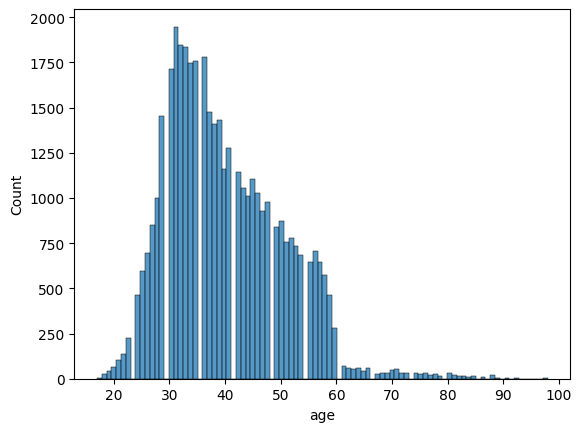

In [23]:
# grafico con seaborn histplot 
sns.histplot(data=df, x="age")

<Axes: xlabel='age', ylabel='Count'>

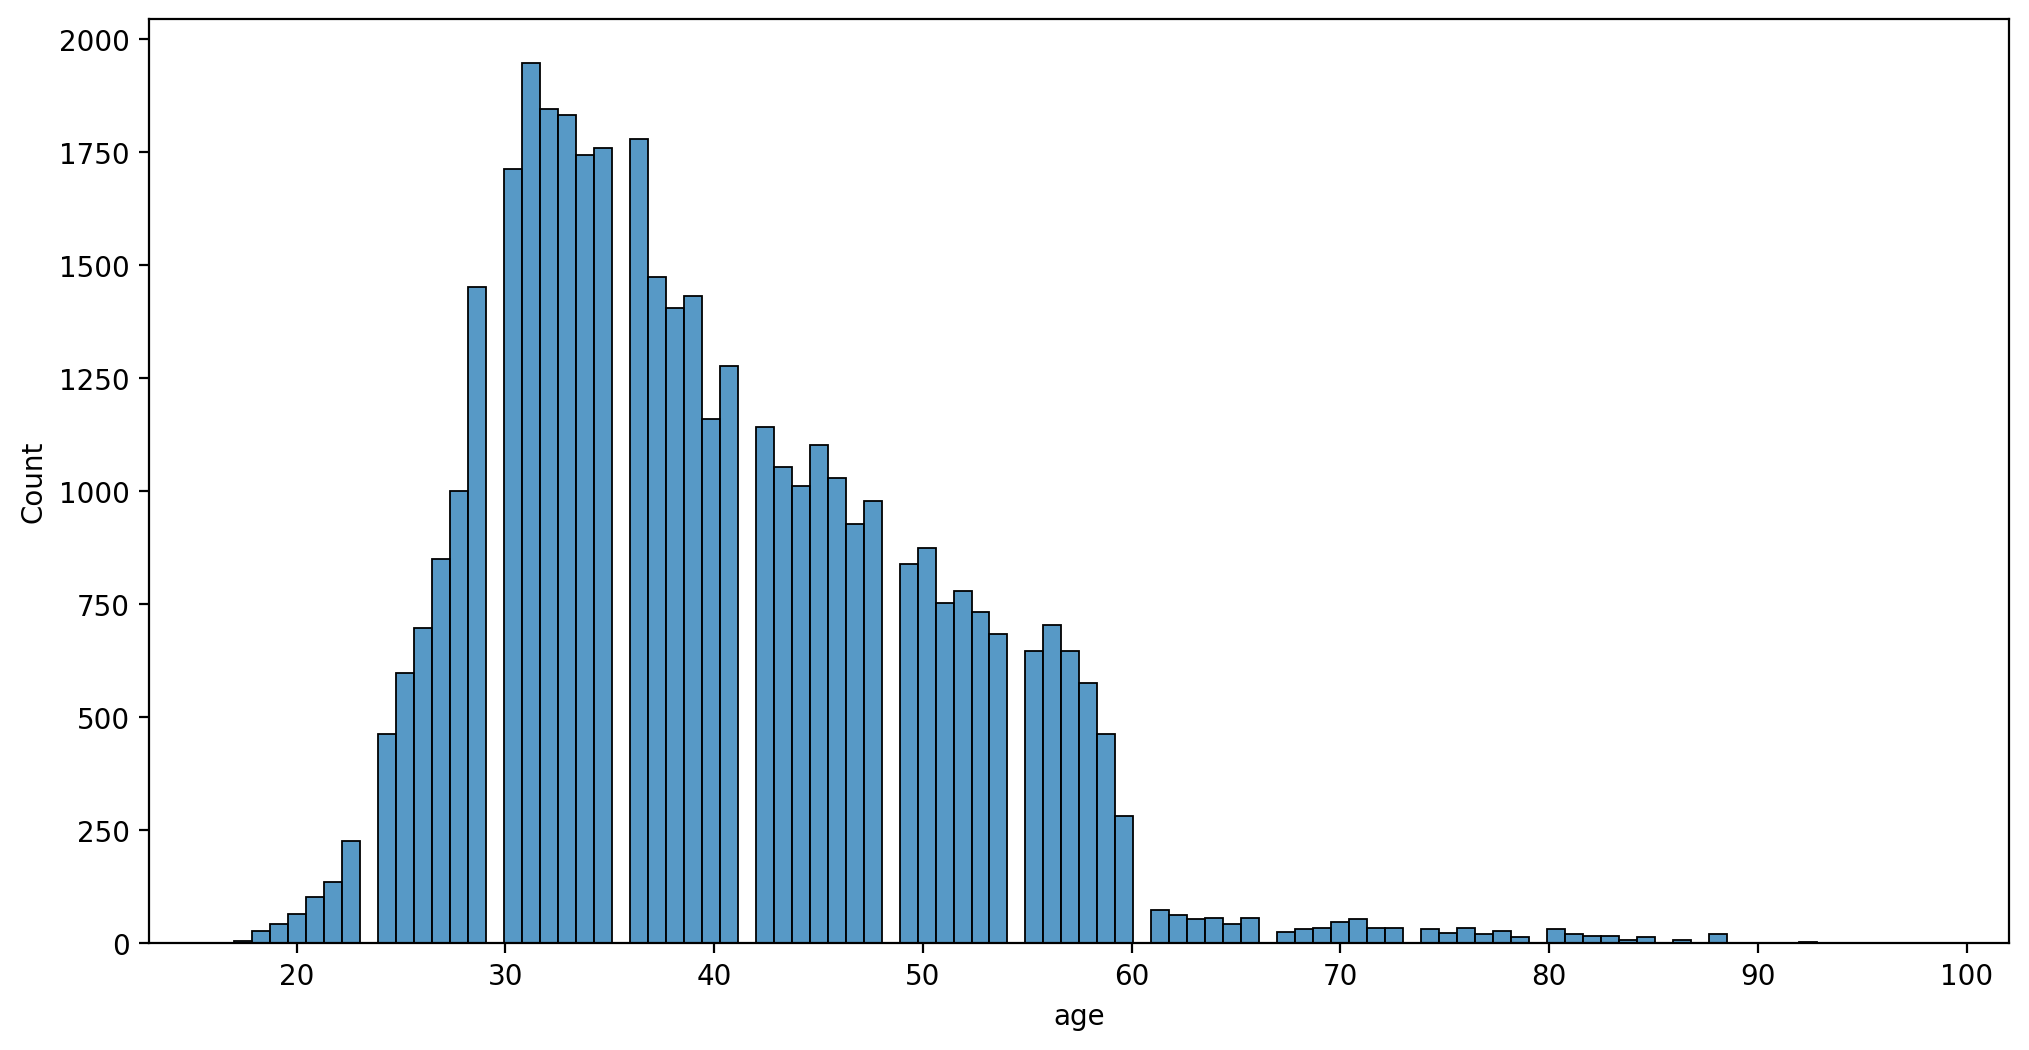

In [24]:
# allargo un po la figura e la risoluzione
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age') 

<Axes: xlabel='age', ylabel='Count'>

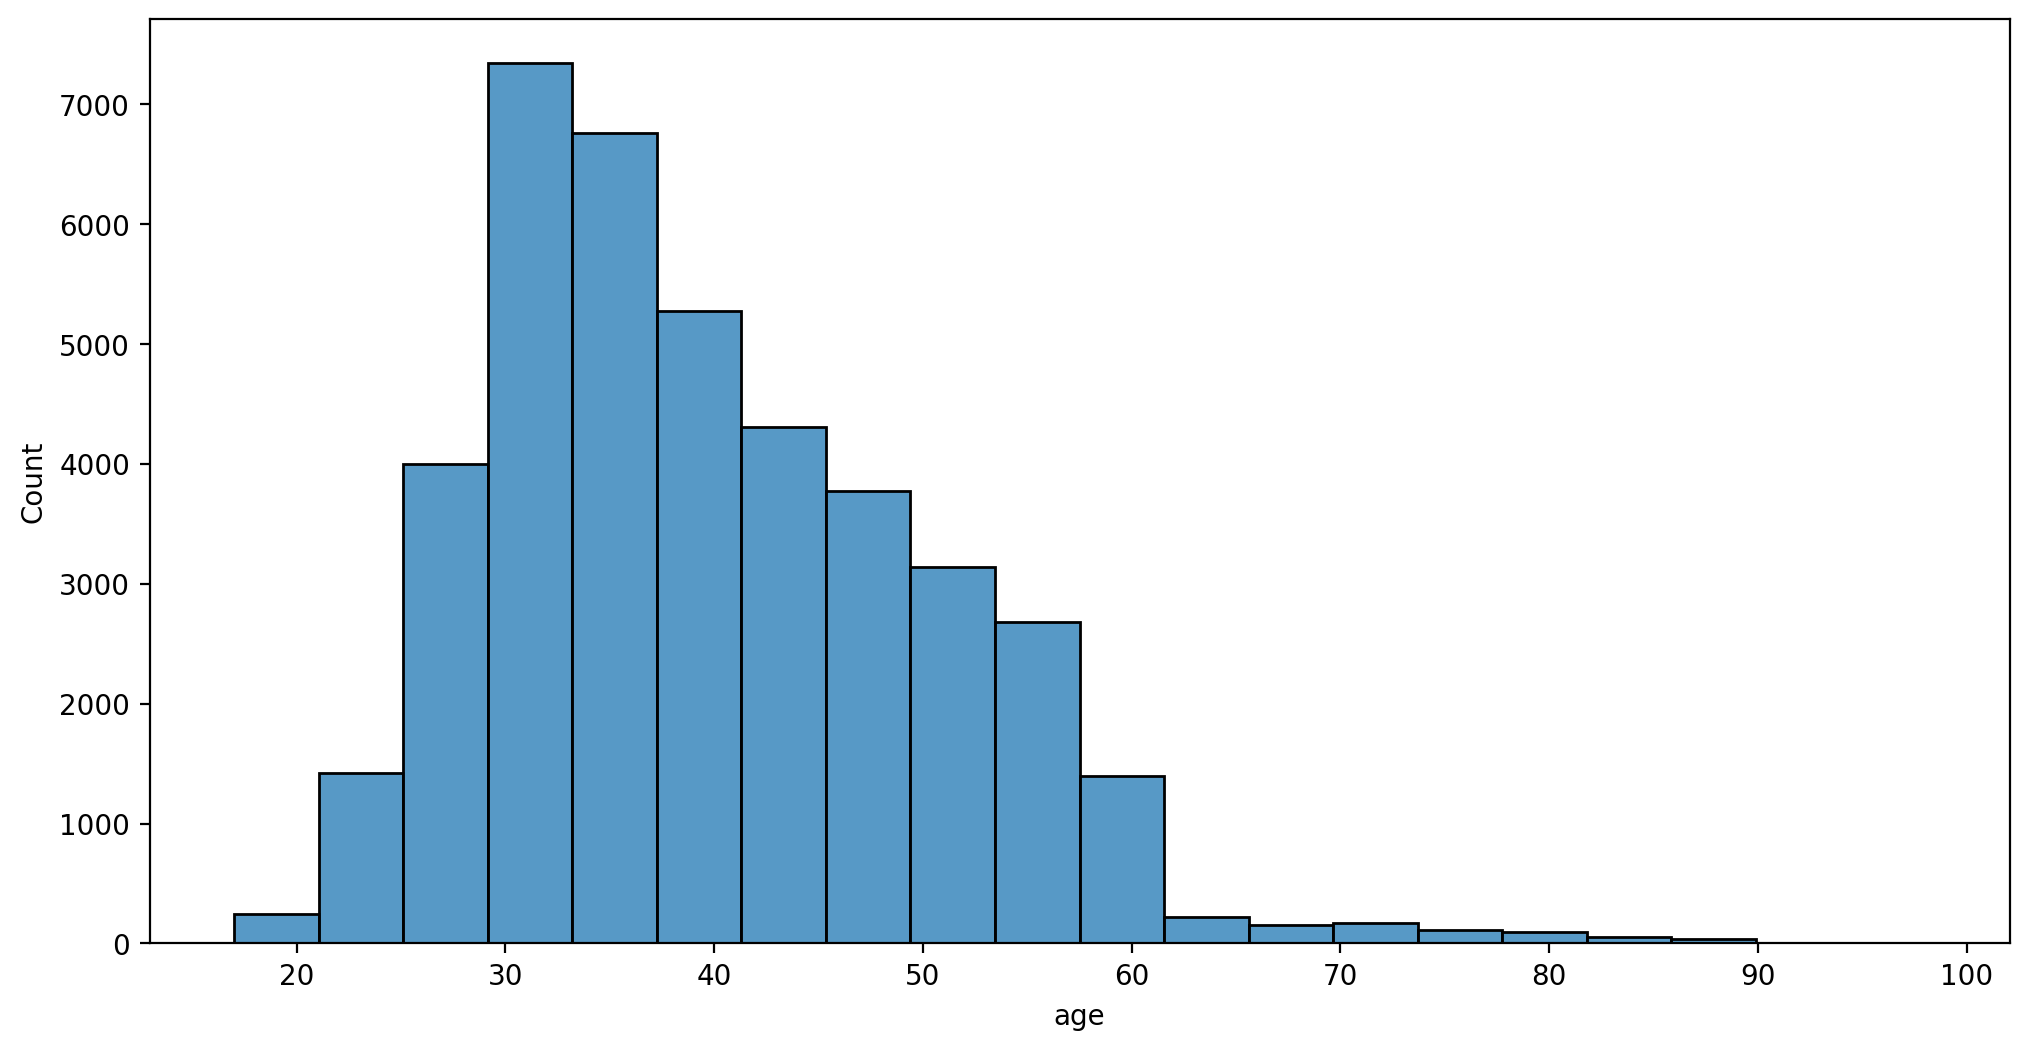

In [26]:
# sembra ci siano dei gap di età vediamo se è reale o se un effetto dei bins
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age', bins=20)

<Axes: xlabel='age', ylabel='Count'>

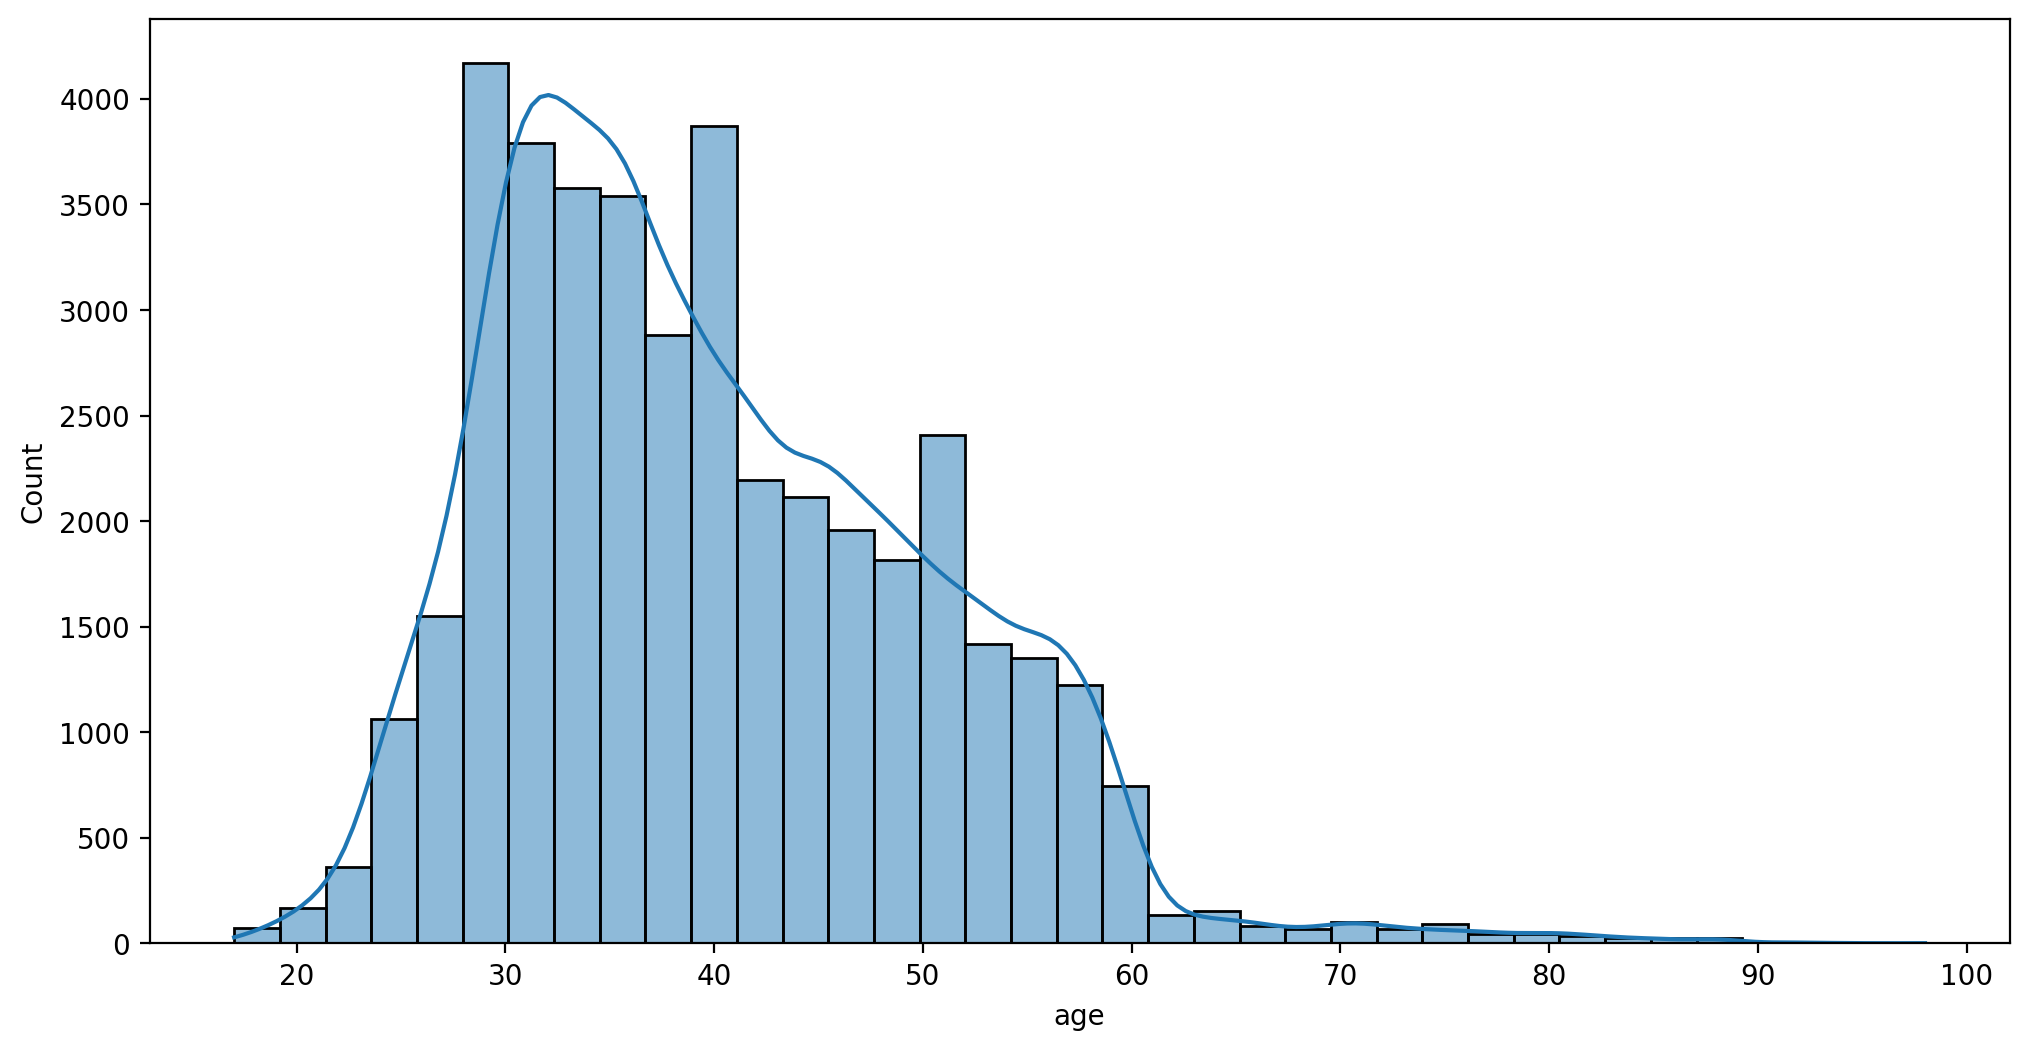

In [30]:
# aggiungo kernel density estimation stima la distribuzione linearizzata
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age', bins=37, kde=True)

#### Età - Prestito Sì/No

Vista la distribuzione di età sartebbe interessante vedere quanti di questi clienti hanno un prestito e quanti invece no.


<Axes: xlabel='age', ylabel='Count'>

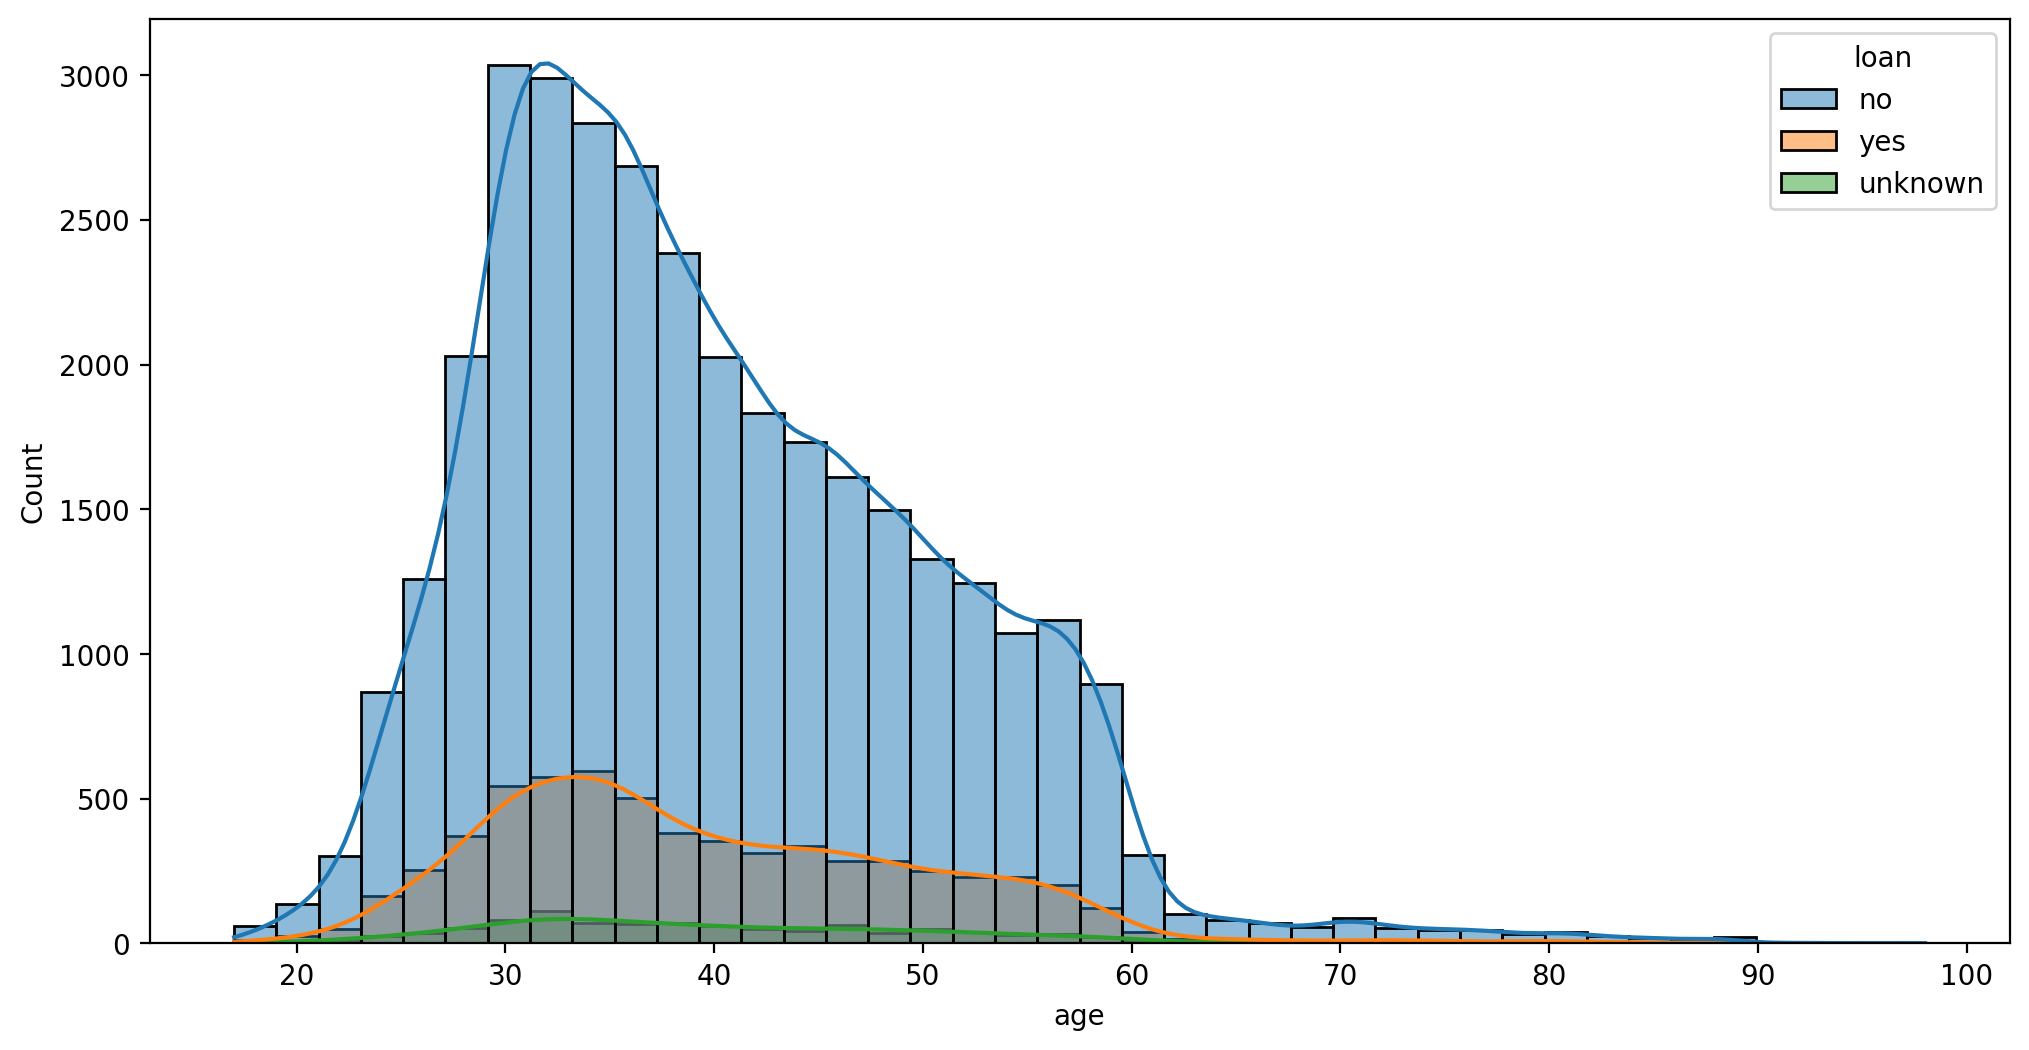

In [35]:
## associo al colore degli istogrammi la feature loan 
plt.figure(figsize=(12,6),dpi=200)

sns.histplot(data=df,x='age',hue='loan', kde=True, bins=40)

**Osservazione**:

Al marketing già questa informazione potrebbe essere utile ovvero raggruppare tutte le persone che non hanno un prestito e sono nella fascia di età giusta.
Mentre potrebbe essere interessante anche sapere chi ha già un prestito per una differente strategia di marketing

**PDAYS**

In numero di giorni trascorsi da quando il cliente è stato contattato è un altro parametro interessante, se devo decidere chi chiamare parto da quelli che non ho mai contattato o che ho contattato molto tempo fa.

*Attenzione* in questa feature si usa il numero 999 per indicare che un cliente non è mai stato contattato.

<Axes: xlabel='pdays', ylabel='Count'>

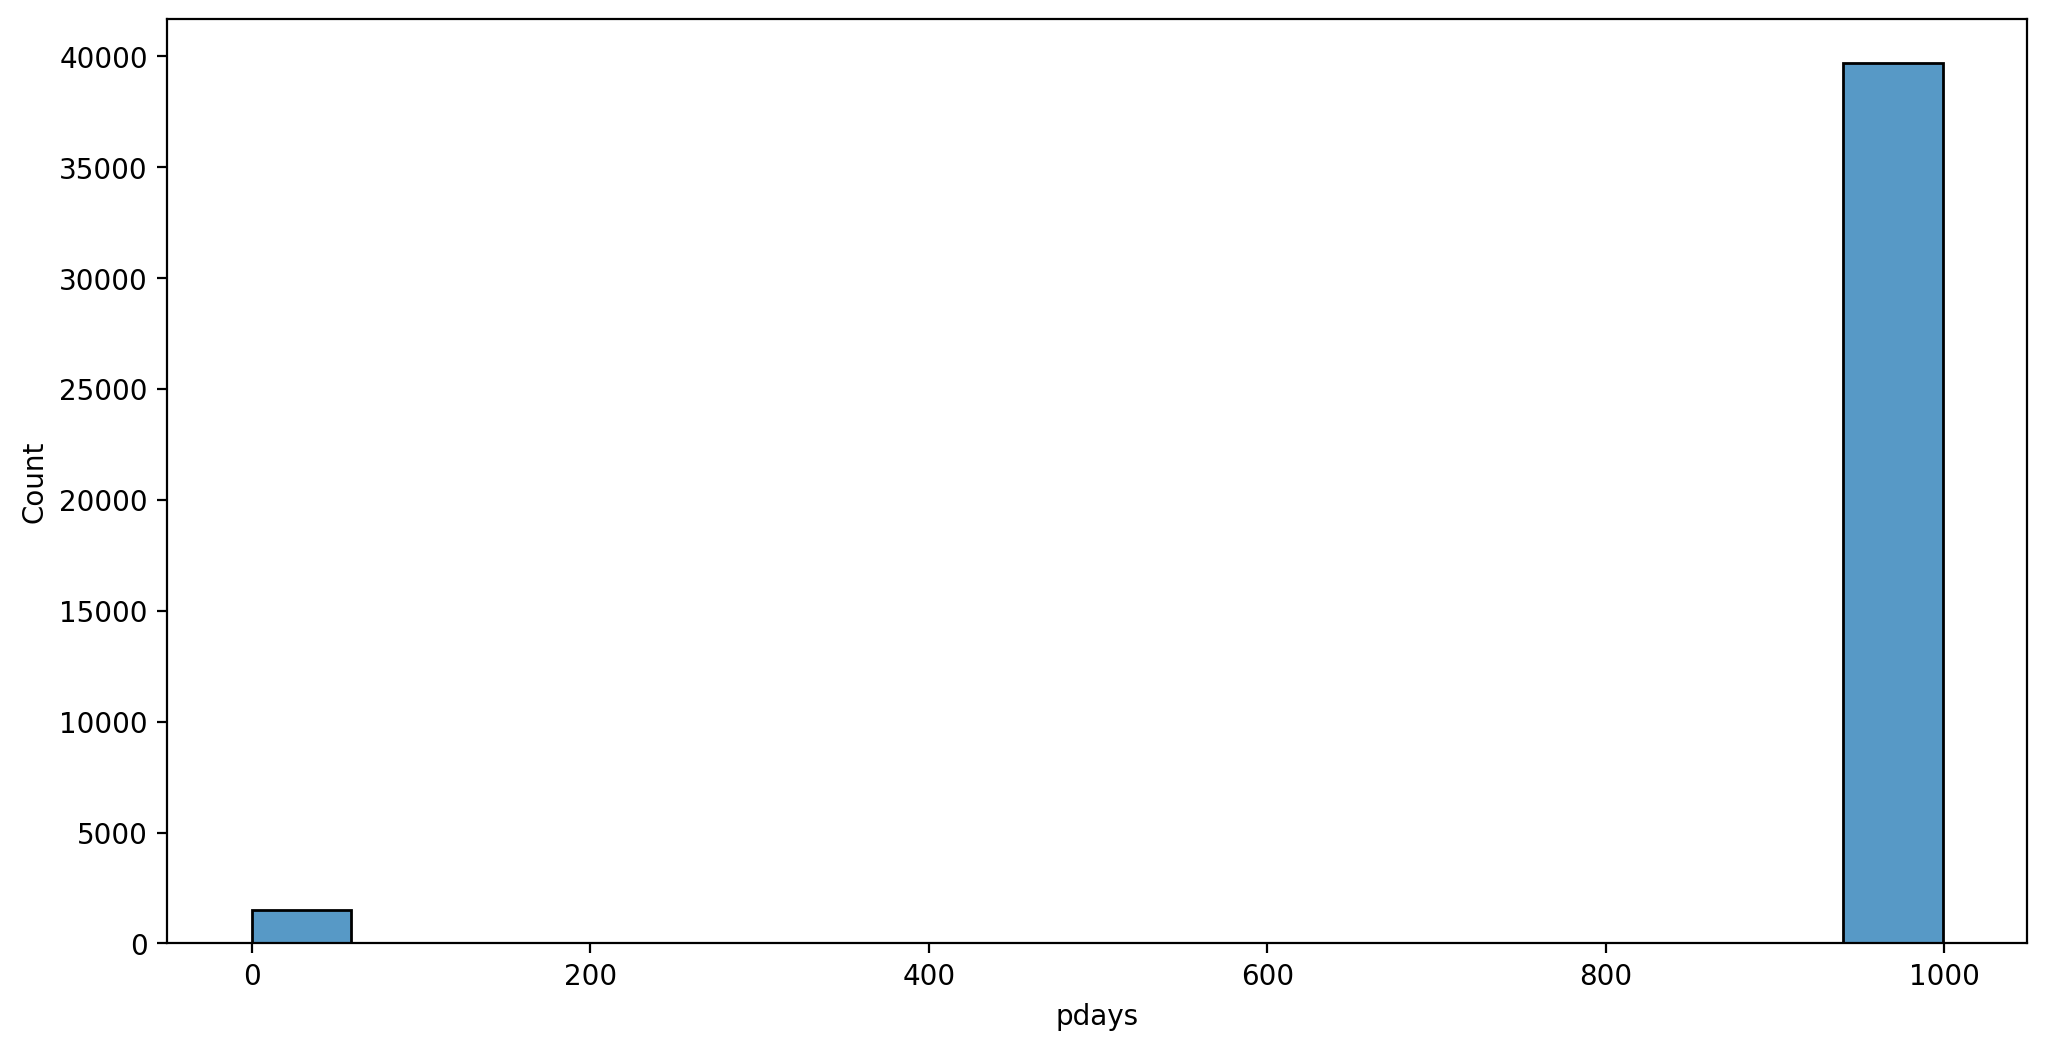

In [38]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='pdays')

In [48]:
# la maggior parte dei clienti non è mai stata contattata
# escludiamo per un attimo i 999 per capire chi è stato contattato con che frequenza
chiamati = df[df['pdays'] != 999]

# clienti non ancora contattati
df['pdays'].size - chiamati['pdays'].size


39673

<Axes: xlabel='pdays', ylabel='Count'>

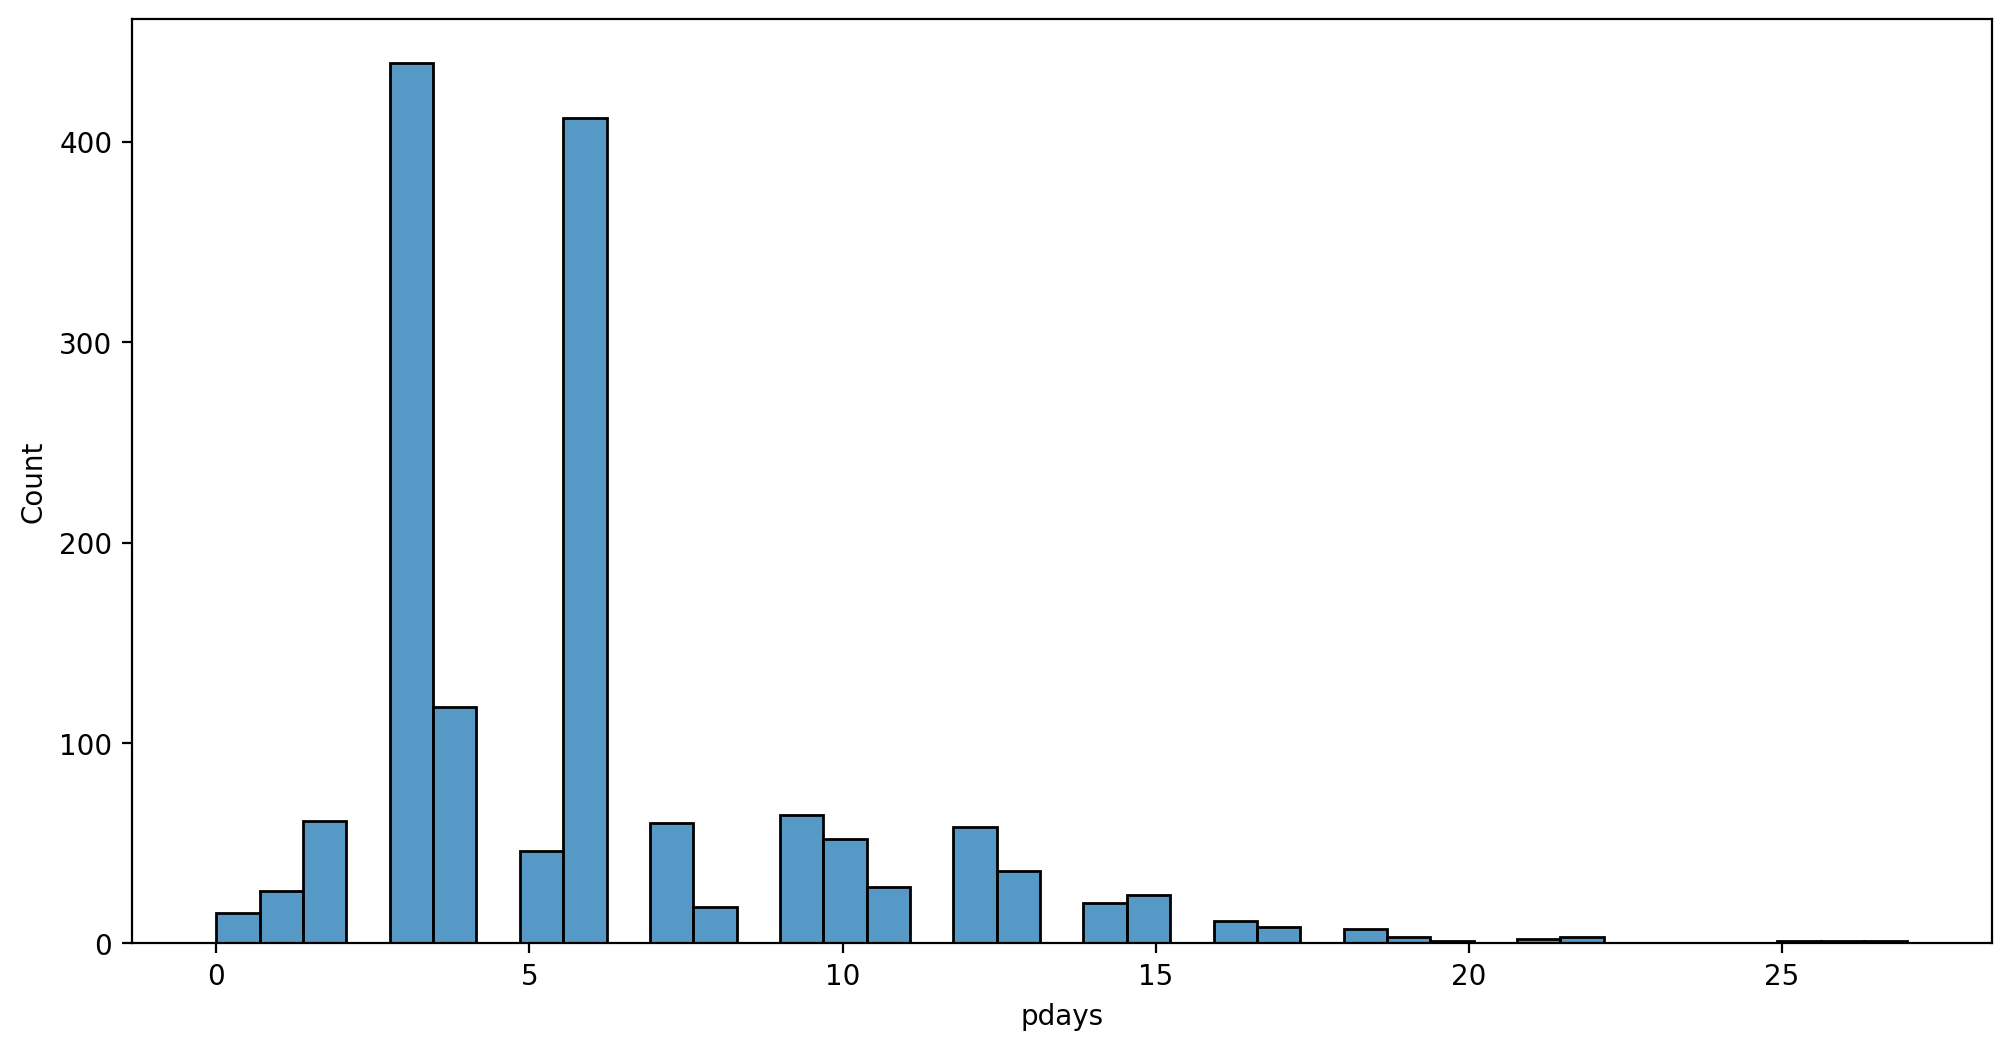

In [39]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays')

**Contact duration - Quanto è durata la chiamata?**

Utile ad esempio per capire se il cliente è disponibile

In [49]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [50]:
df['duration'] # durata in secondi

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

In [53]:
df['duration'].value_counts().sort_index()

58

<Axes: xlabel='duration', ylabel='Count'>

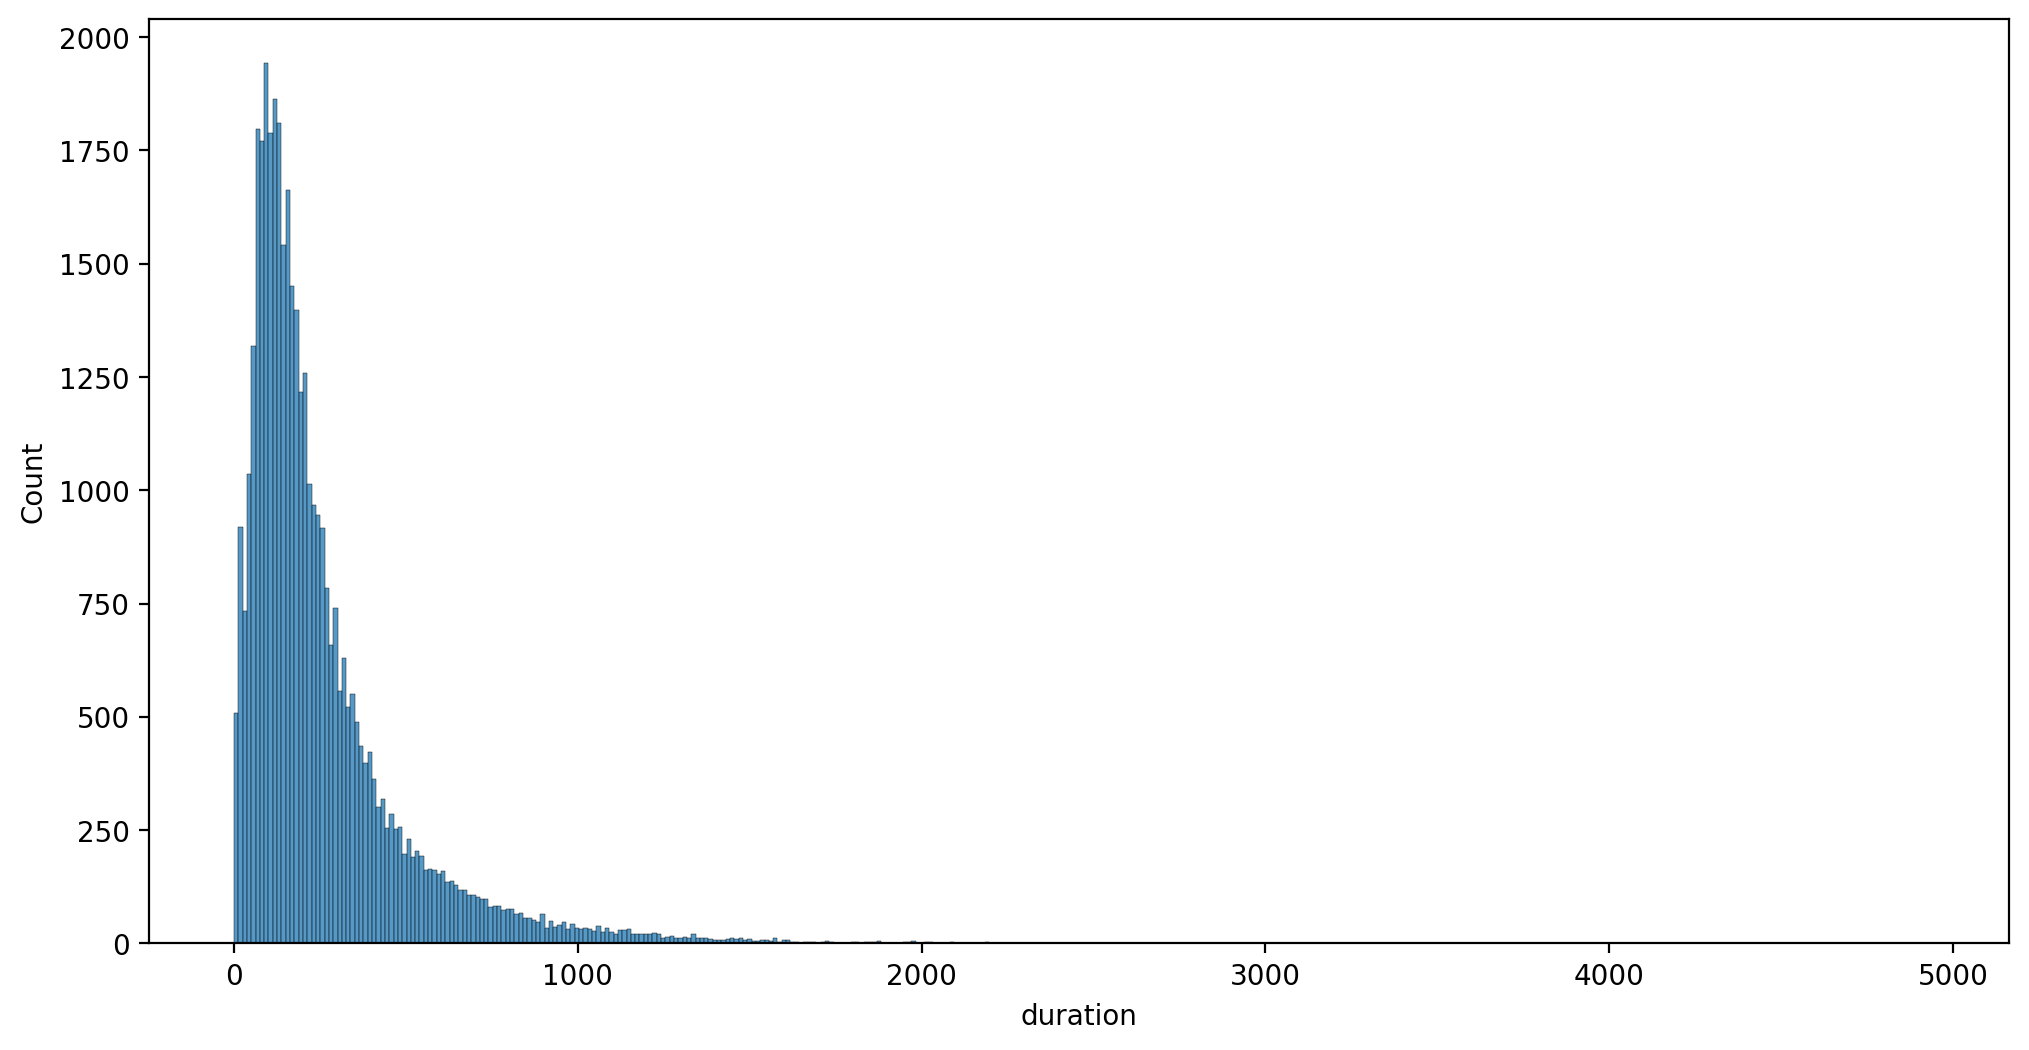

In [56]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='duration')

<Axes: xlabel='duration', ylabel='Count'>

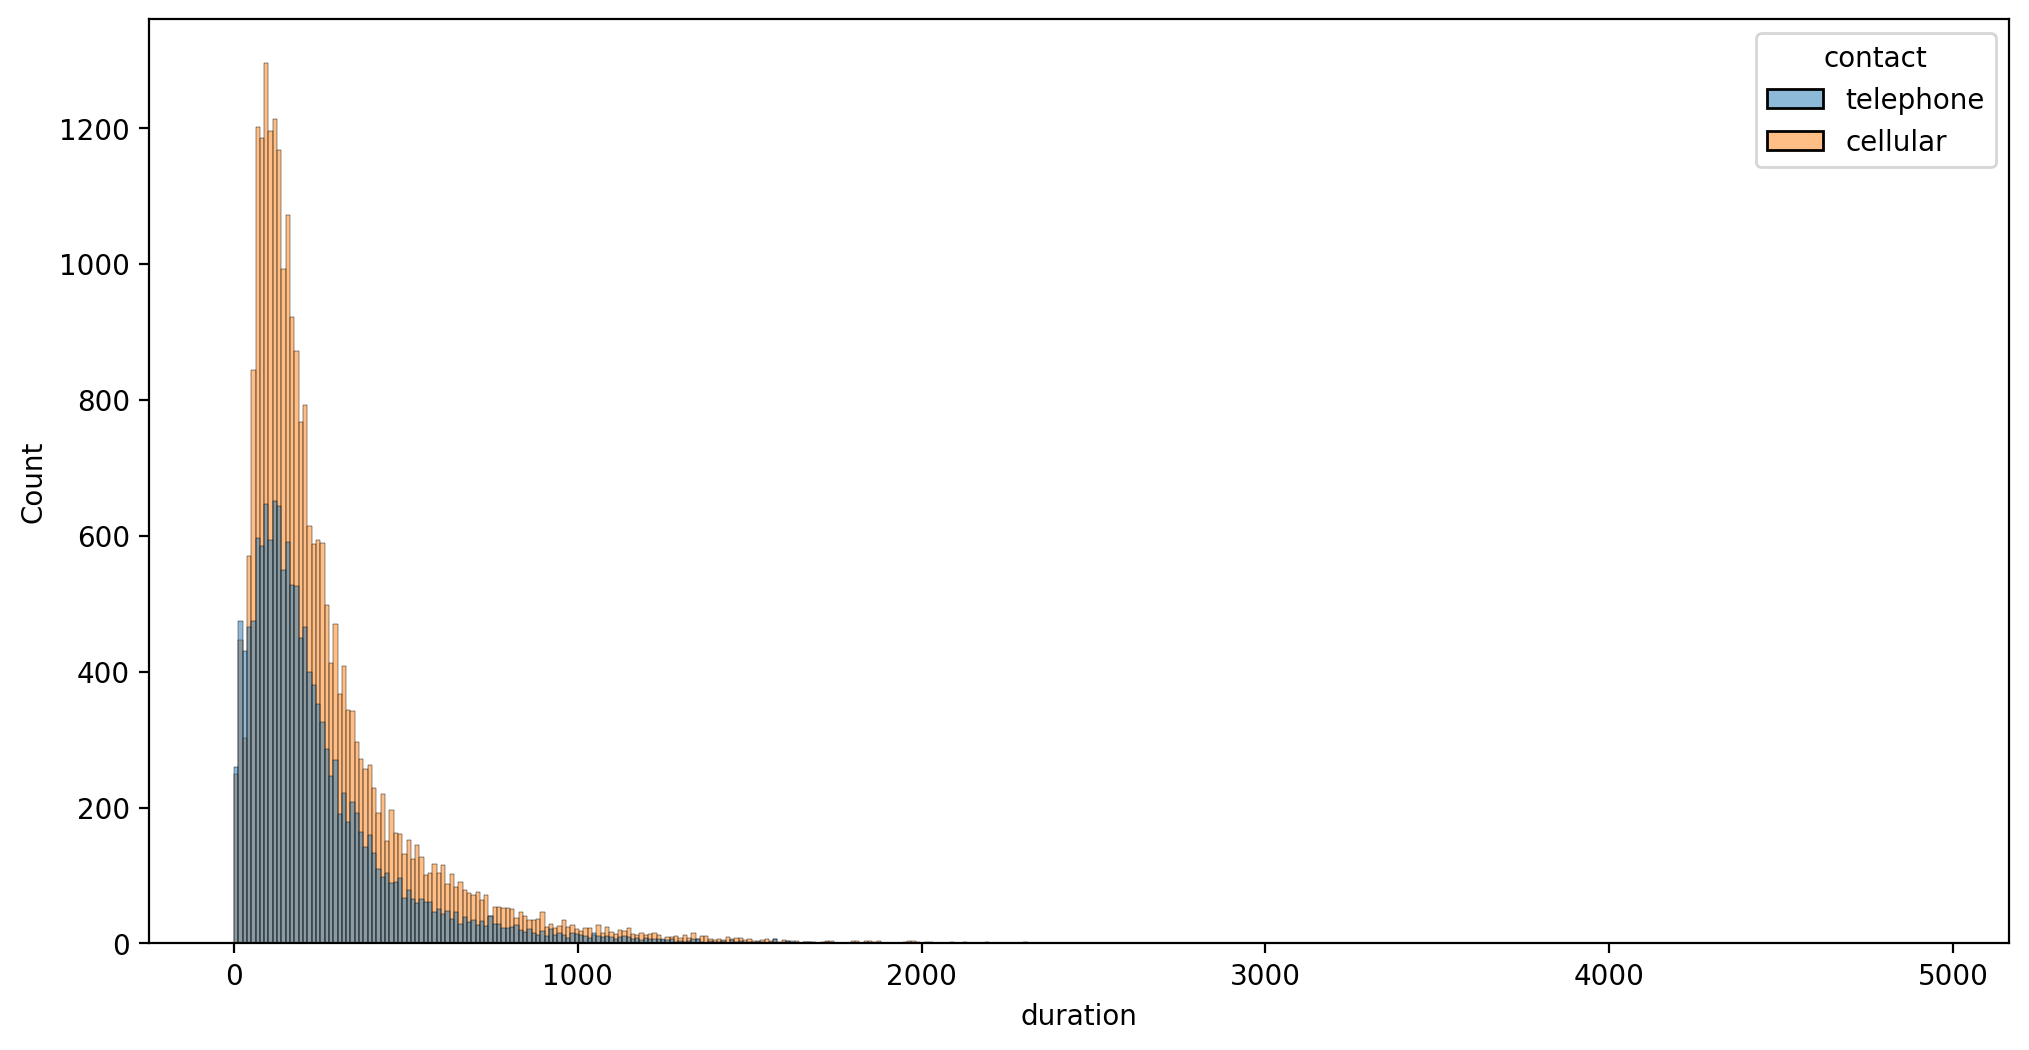

In [58]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='duration', hue='contact')

magari non ci interessa molto se una o due persone sono state al telefono per un'ora

vediamo le durate da 0 a 10 min

(0.0, 1000.0)

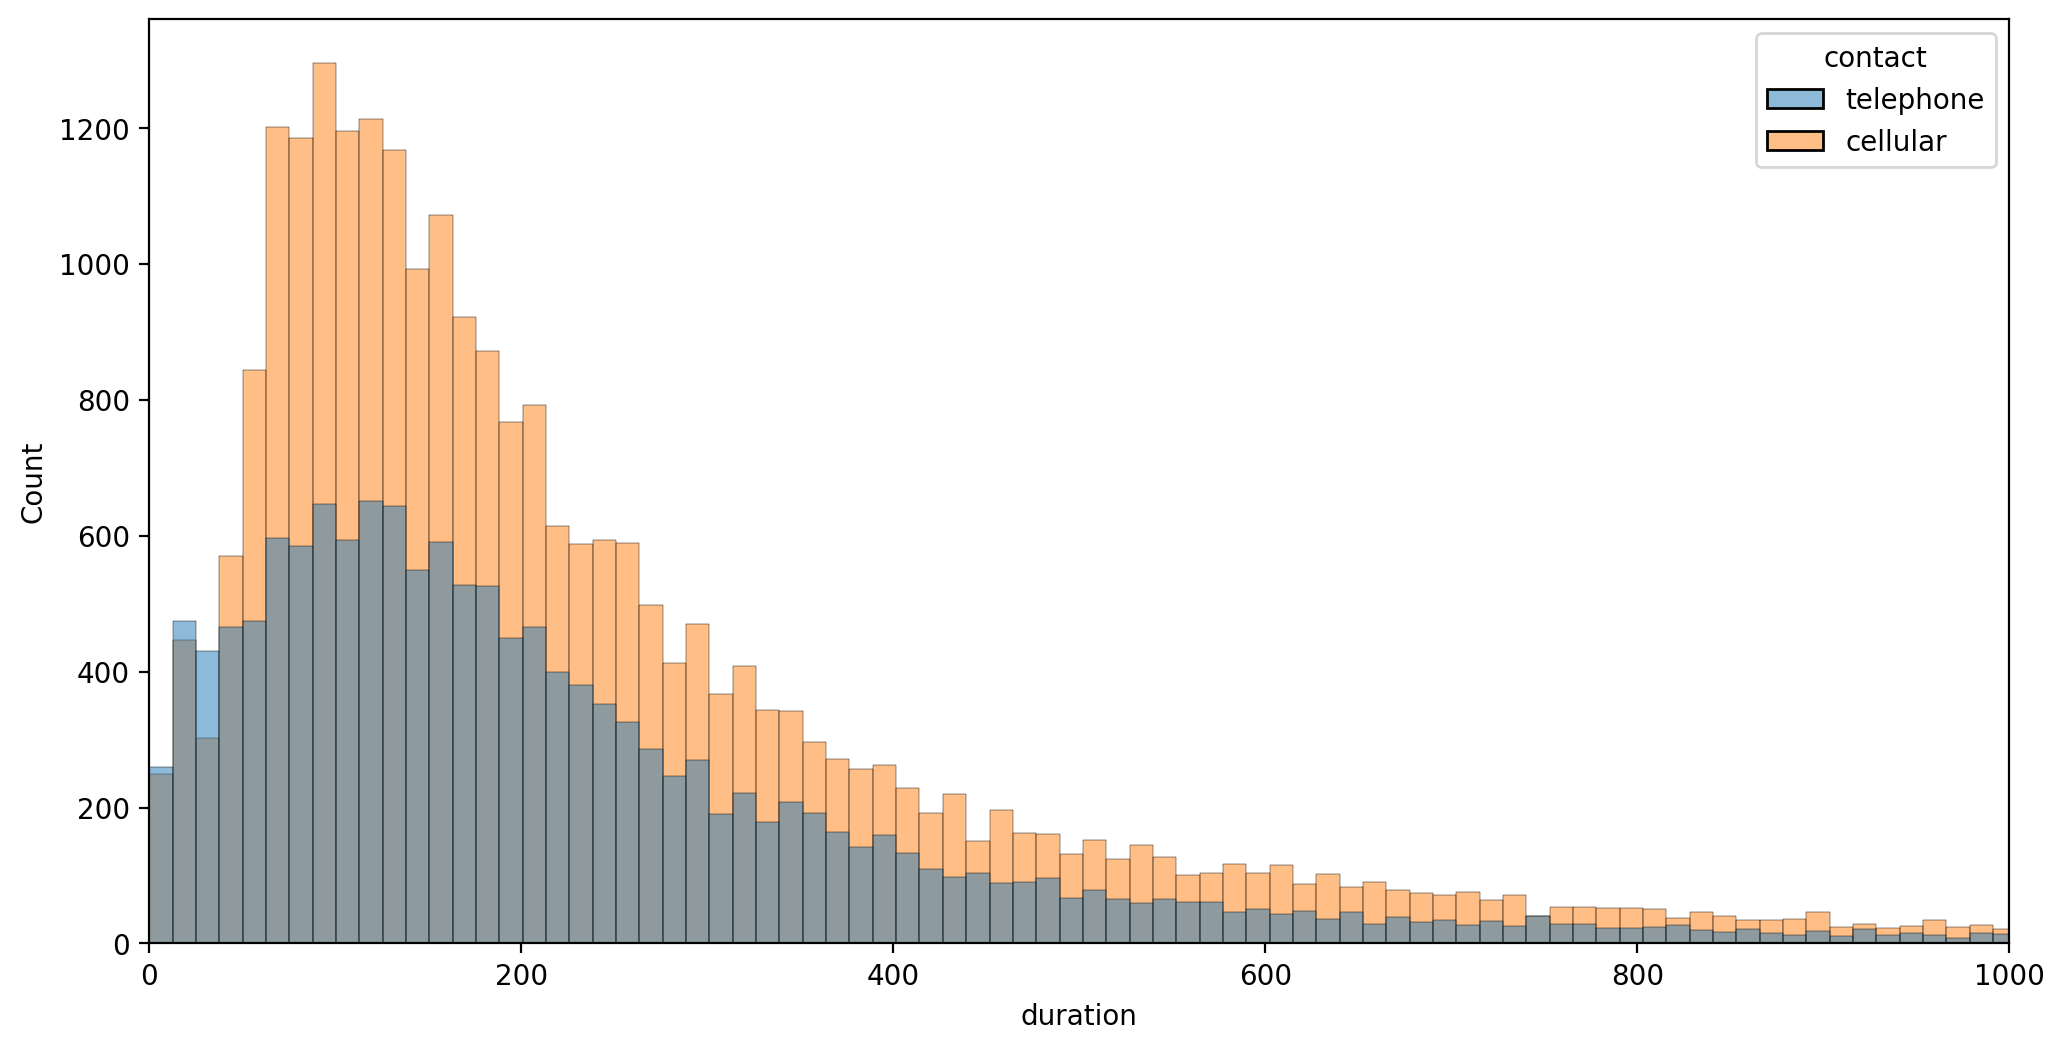

In [60]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,1000)

<Axes: xlabel='contact', ylabel='count'>

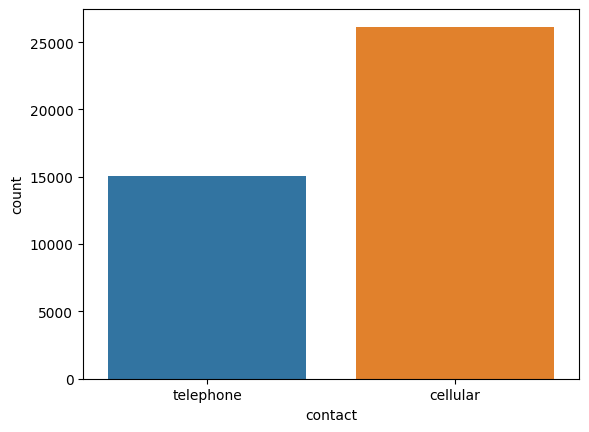

In [61]:
sns.countplot(data=df, x='contact')

* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"

<AxesSubplot:xlabel='previous', ylabel='count'>

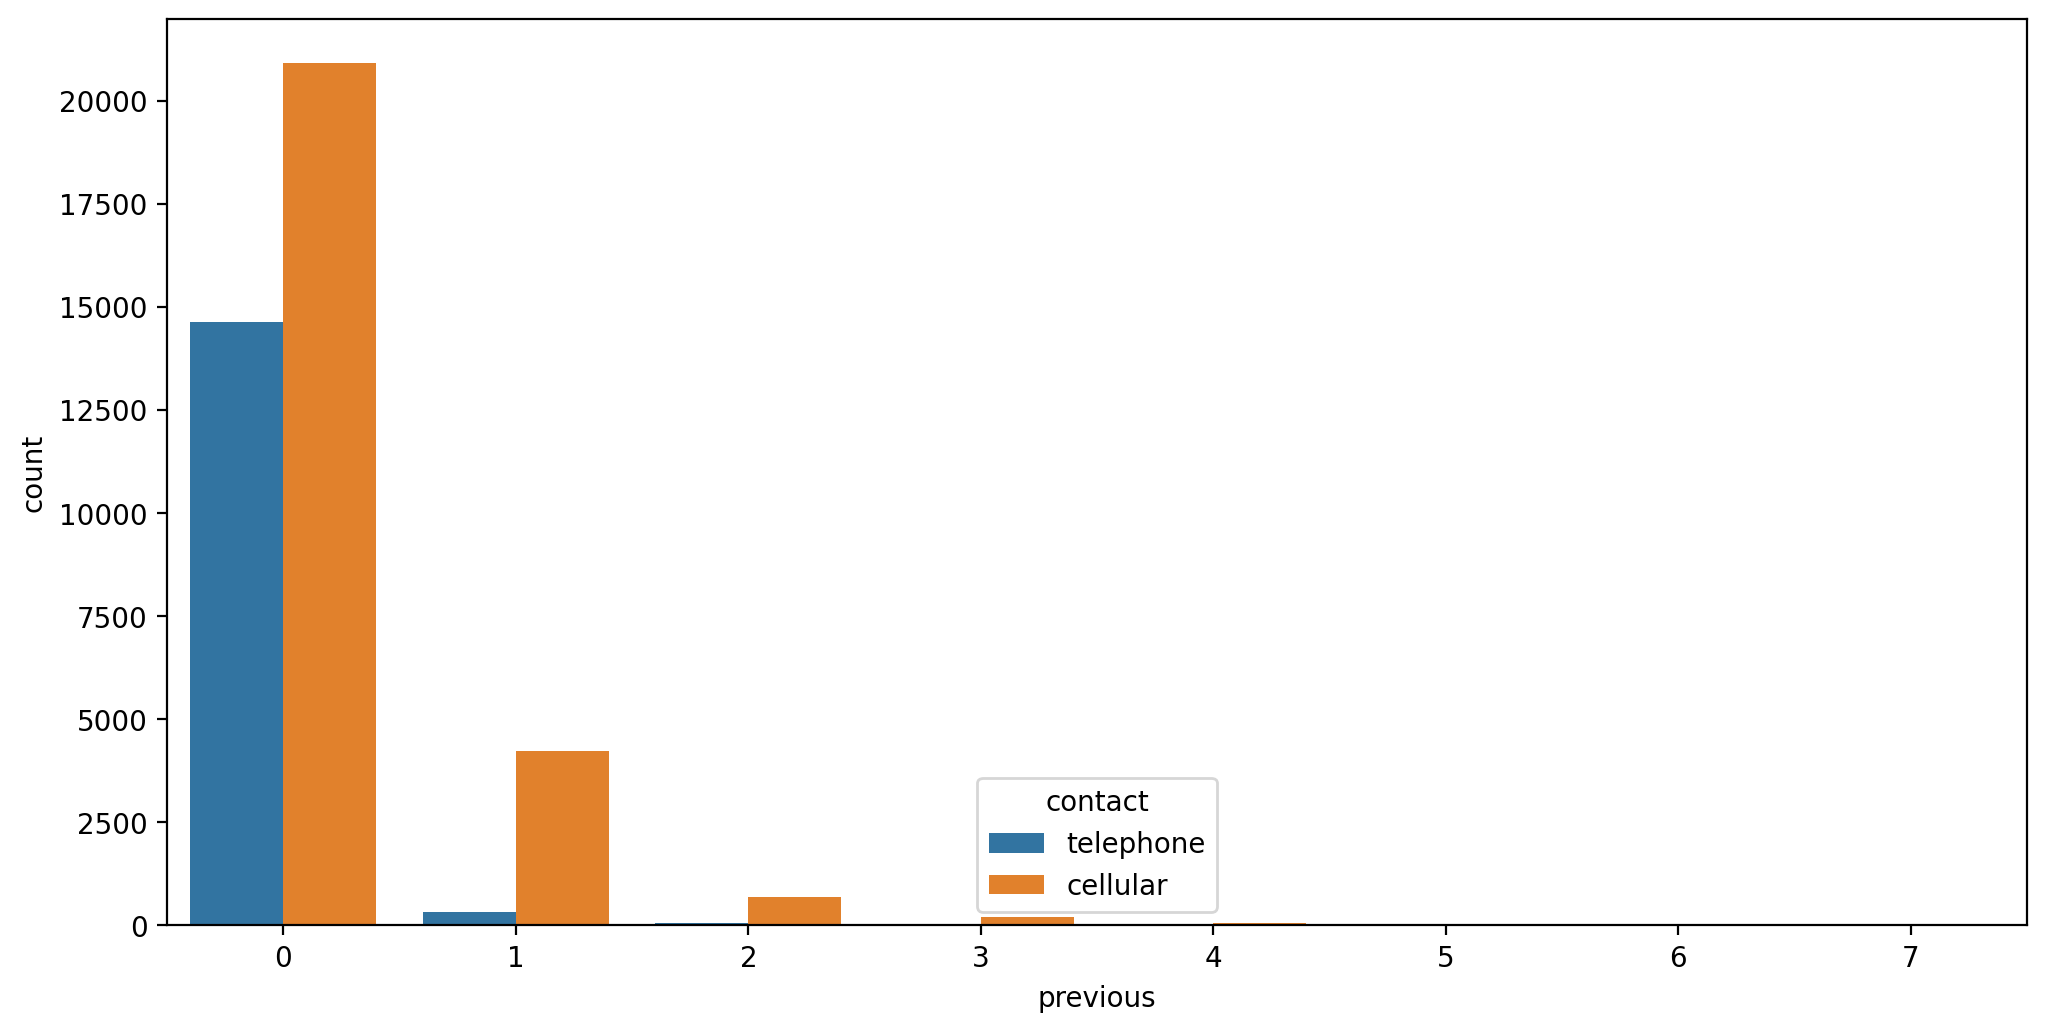

In [177]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='previous',hue='contact')

<Axes: xlabel='poutcome', ylabel='count'>

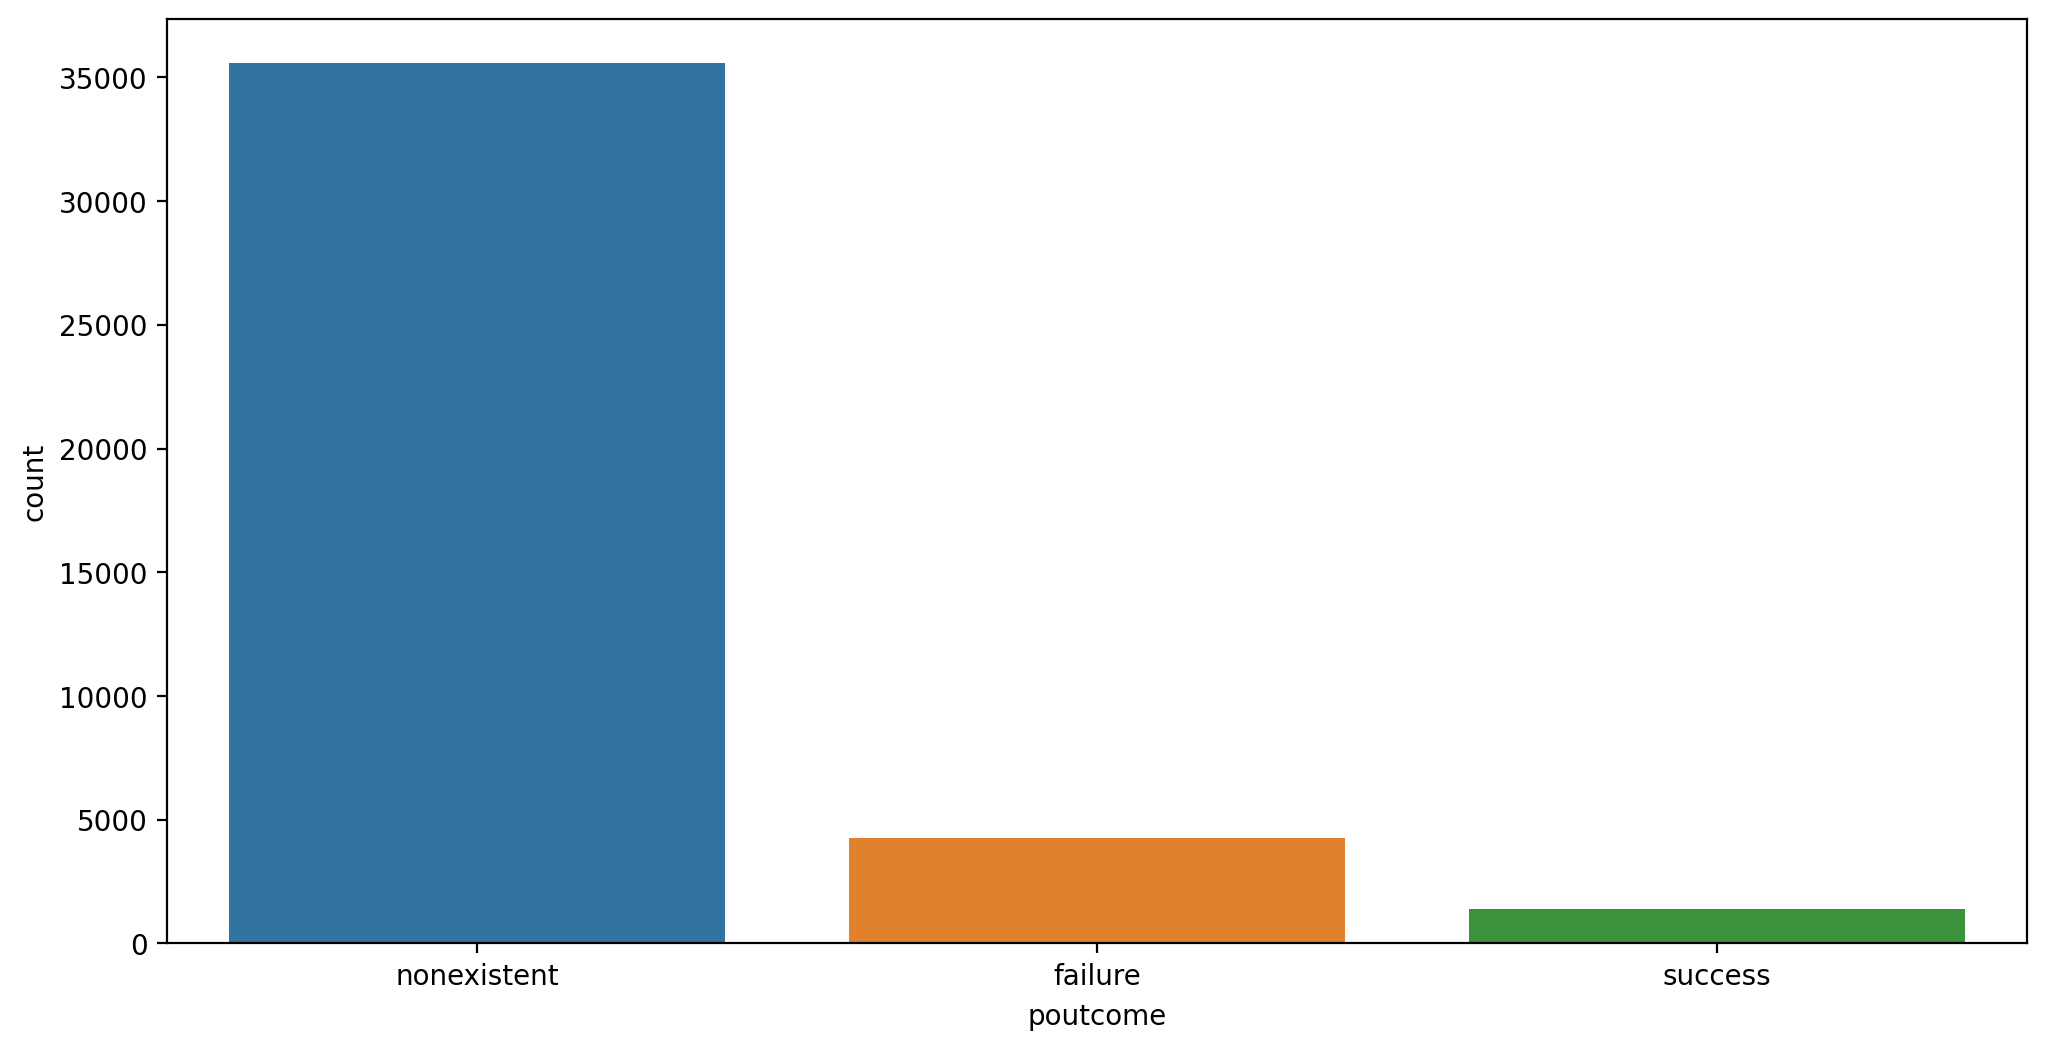

In [62]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='poutcome')

In [64]:
df['previous'].value_counts()
# df['previous'].value_counts().sum()-36954
# 36954 vs. 8257

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

## Categorical Features

In [65]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


 #### Tipo di lavoro

 Proviamo a fare un grafico a istogrammi per le frequenze dei diversi tipi di lavori presenti nel dataframe

<Axes: xlabel='job', ylabel='count'>

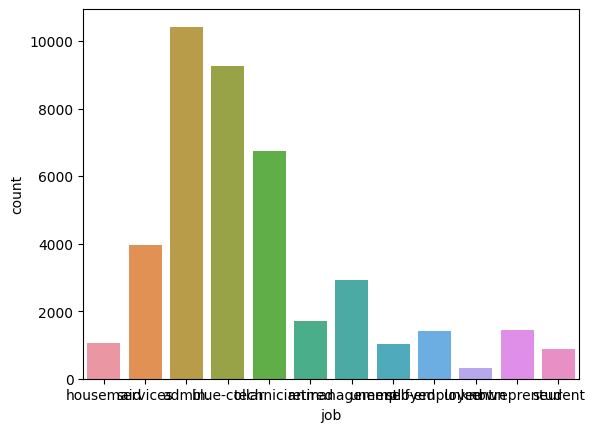

In [66]:
sns.countplot(data=df, x='job')

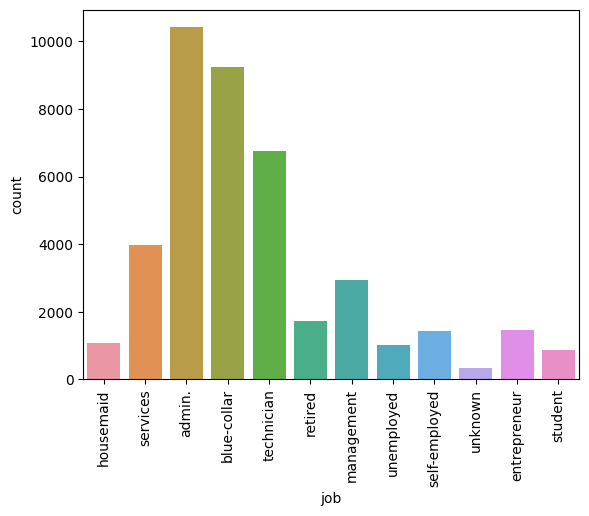

In [68]:
sns.countplot(data=df, x='job')
plt.xticks(rotation=90);

In [71]:
job_ordinati = df['job'].value_counts().index

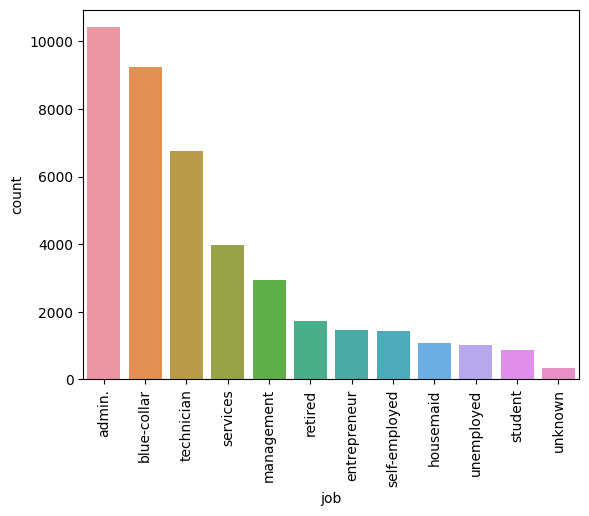

In [72]:
# sorting
sns.countplot(data=df, x='job', order=job_ordinati)
plt.xticks(rotation=90);

**Stessa cosa per i titoli di studio**

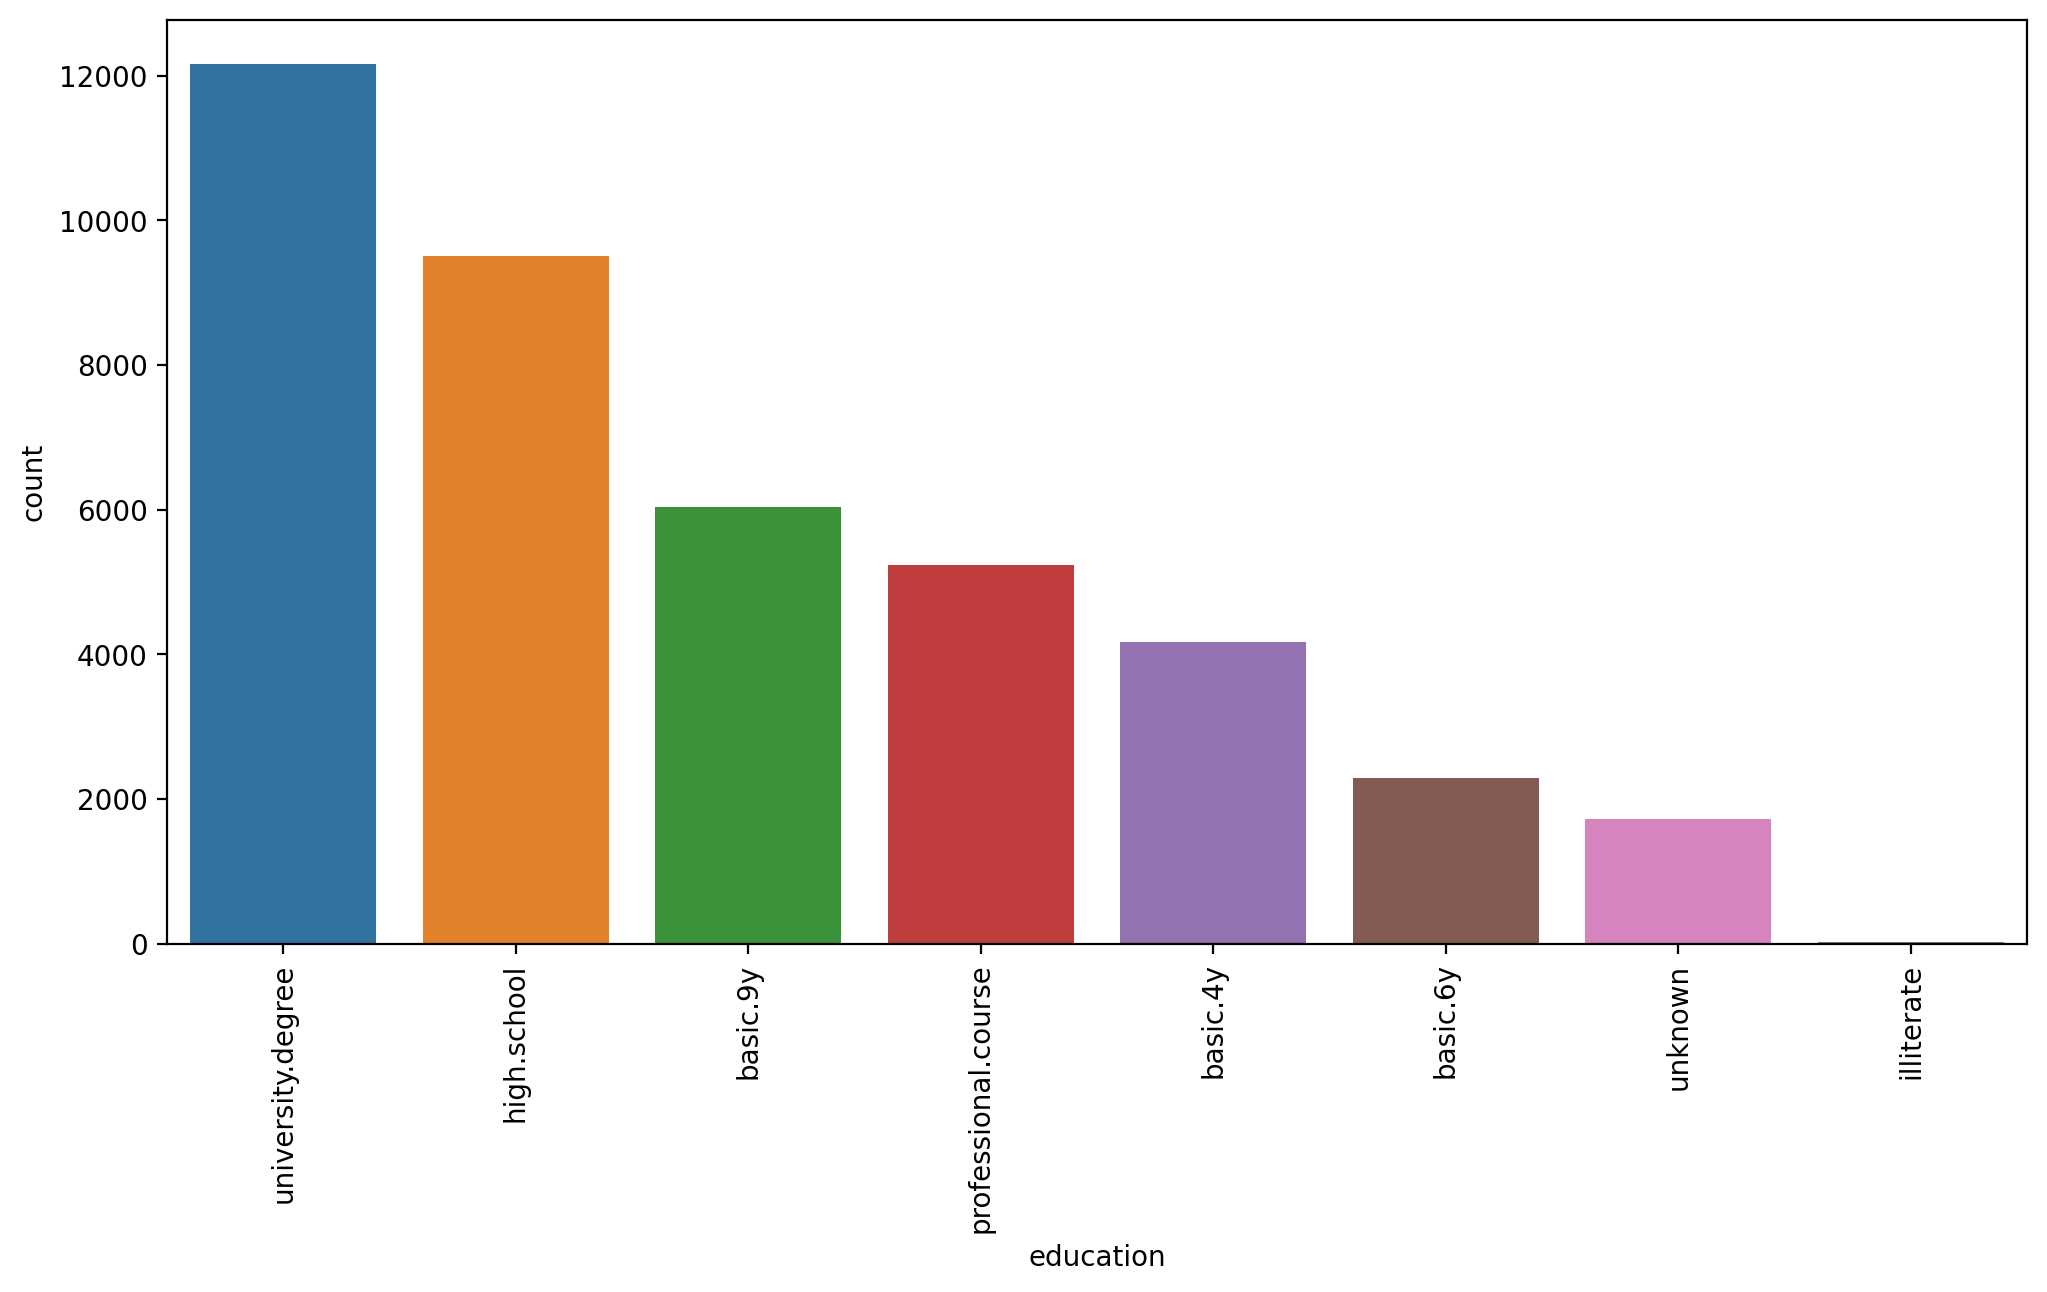

In [73]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

In [74]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

**Vediamo il titolo di studio in rapporto al default**

Il campo default indica se non è stato possibile ripagare il prestito.


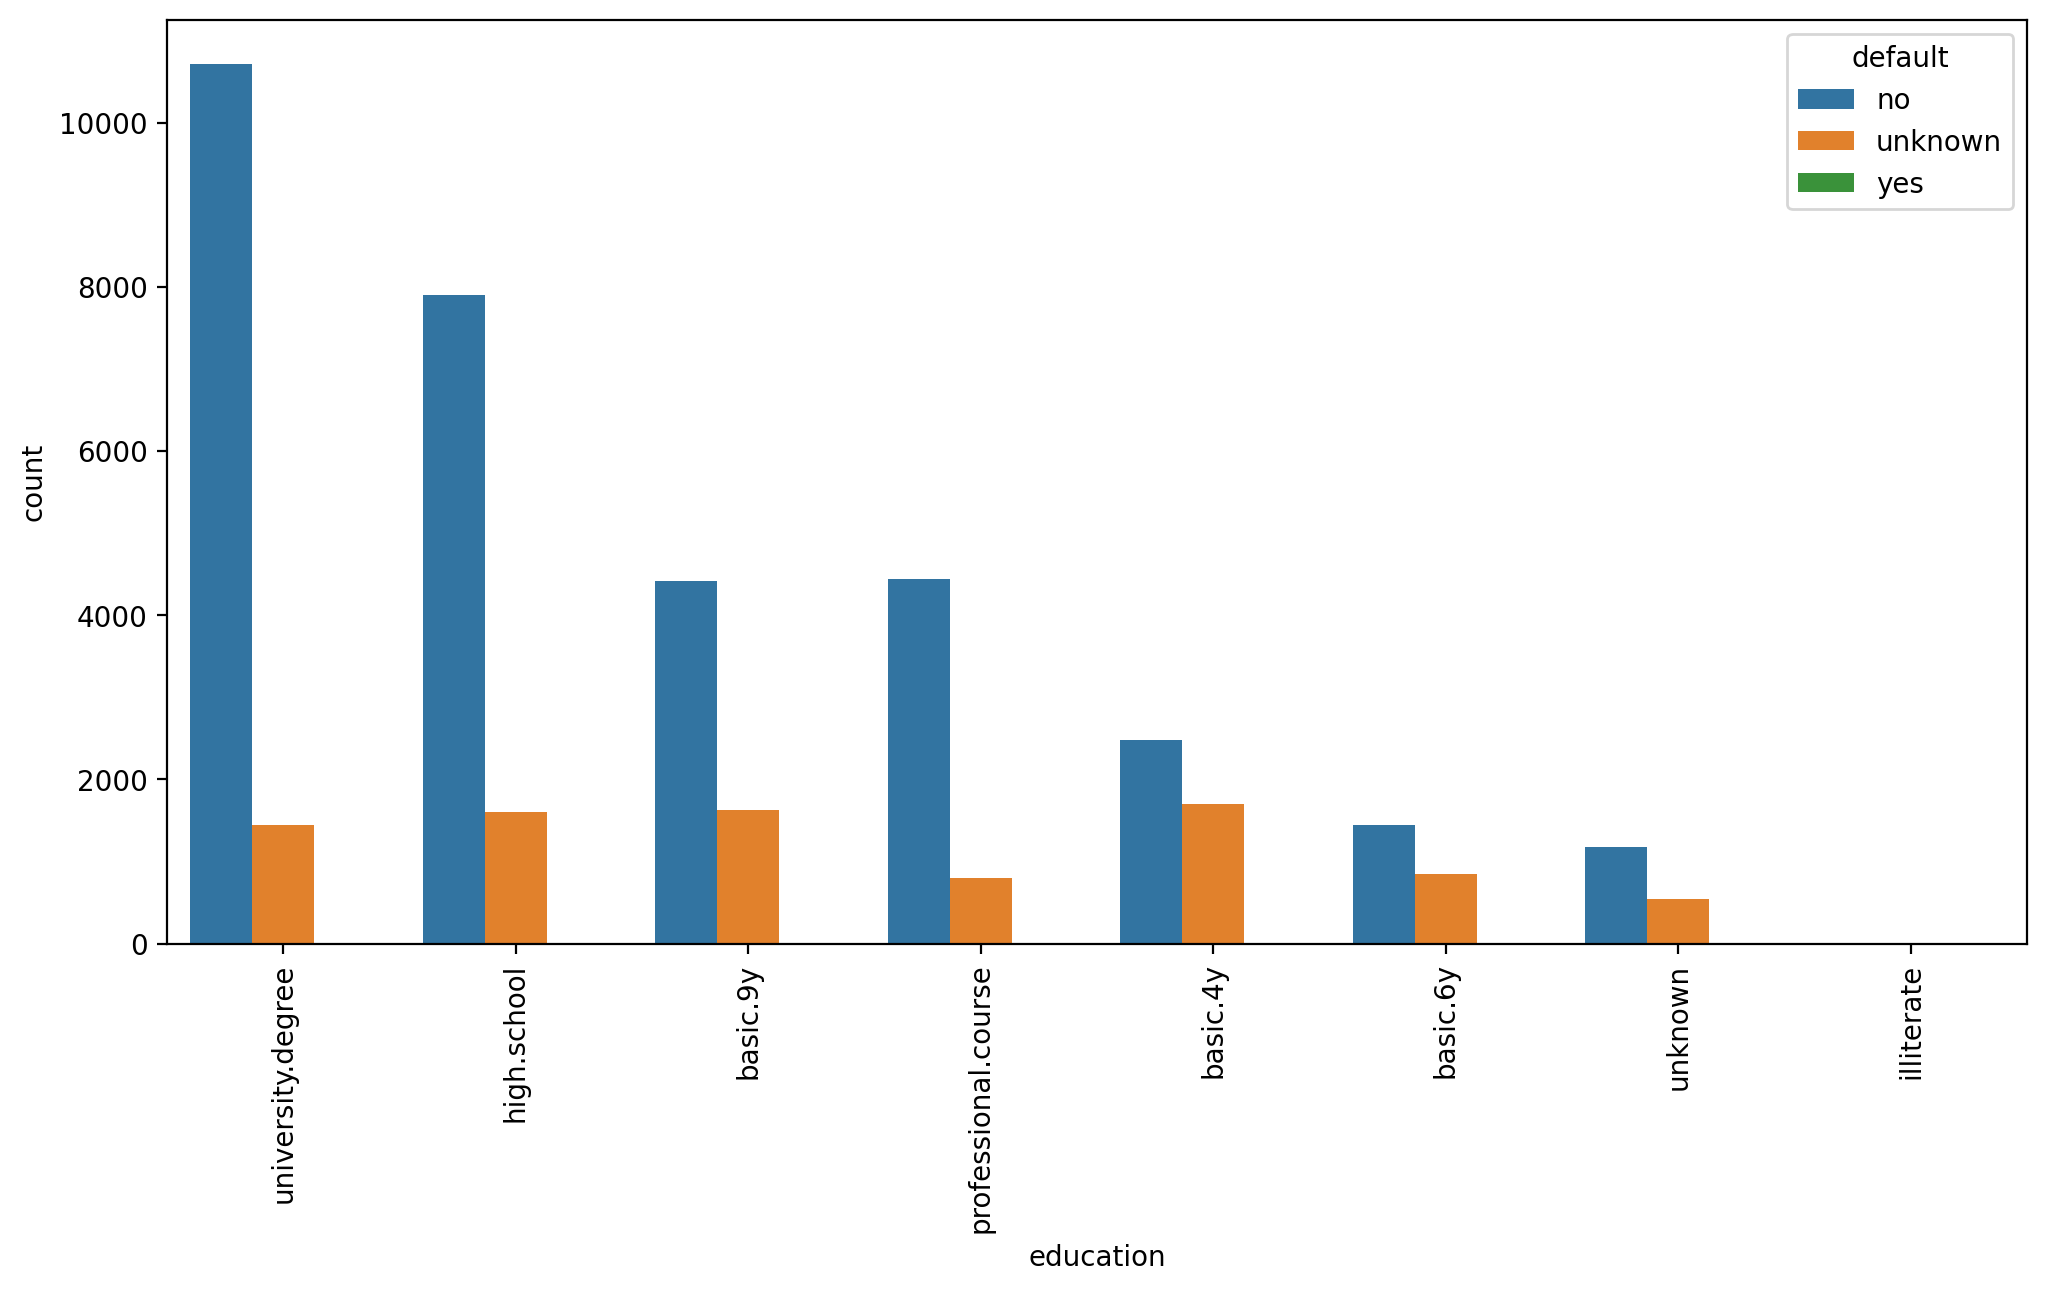

In [75]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

**N.B.** notiamo che praticamente nessuno è andato in default 

<AxesSubplot:xlabel='default', ylabel='count'>

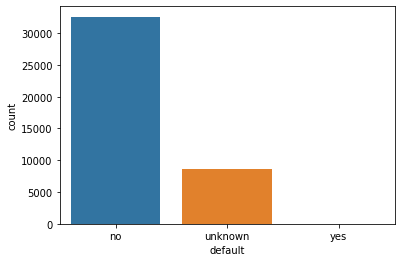

In [184]:
sns.countplot(data=df,x='default')

In [77]:
df['default'].value_counts()

In [81]:
hanno_loan = df[df['loan'] == 'yes']
hanno_loan['default'].value_counts()

no         4976
unknown    1272
Name: default, dtype: int64

In [102]:
no_loan = df[df['loan'] == 'no']
no_loan['default'].value_counts()
no_loan[no_loan['default'] == 'yes']
no_loan.loc[no_loan['default'] == 'yes', ['job', 'education']]

,job,education
21580,technician,professional.course
21581,technician,professional.course
24866,unemployed,high.school


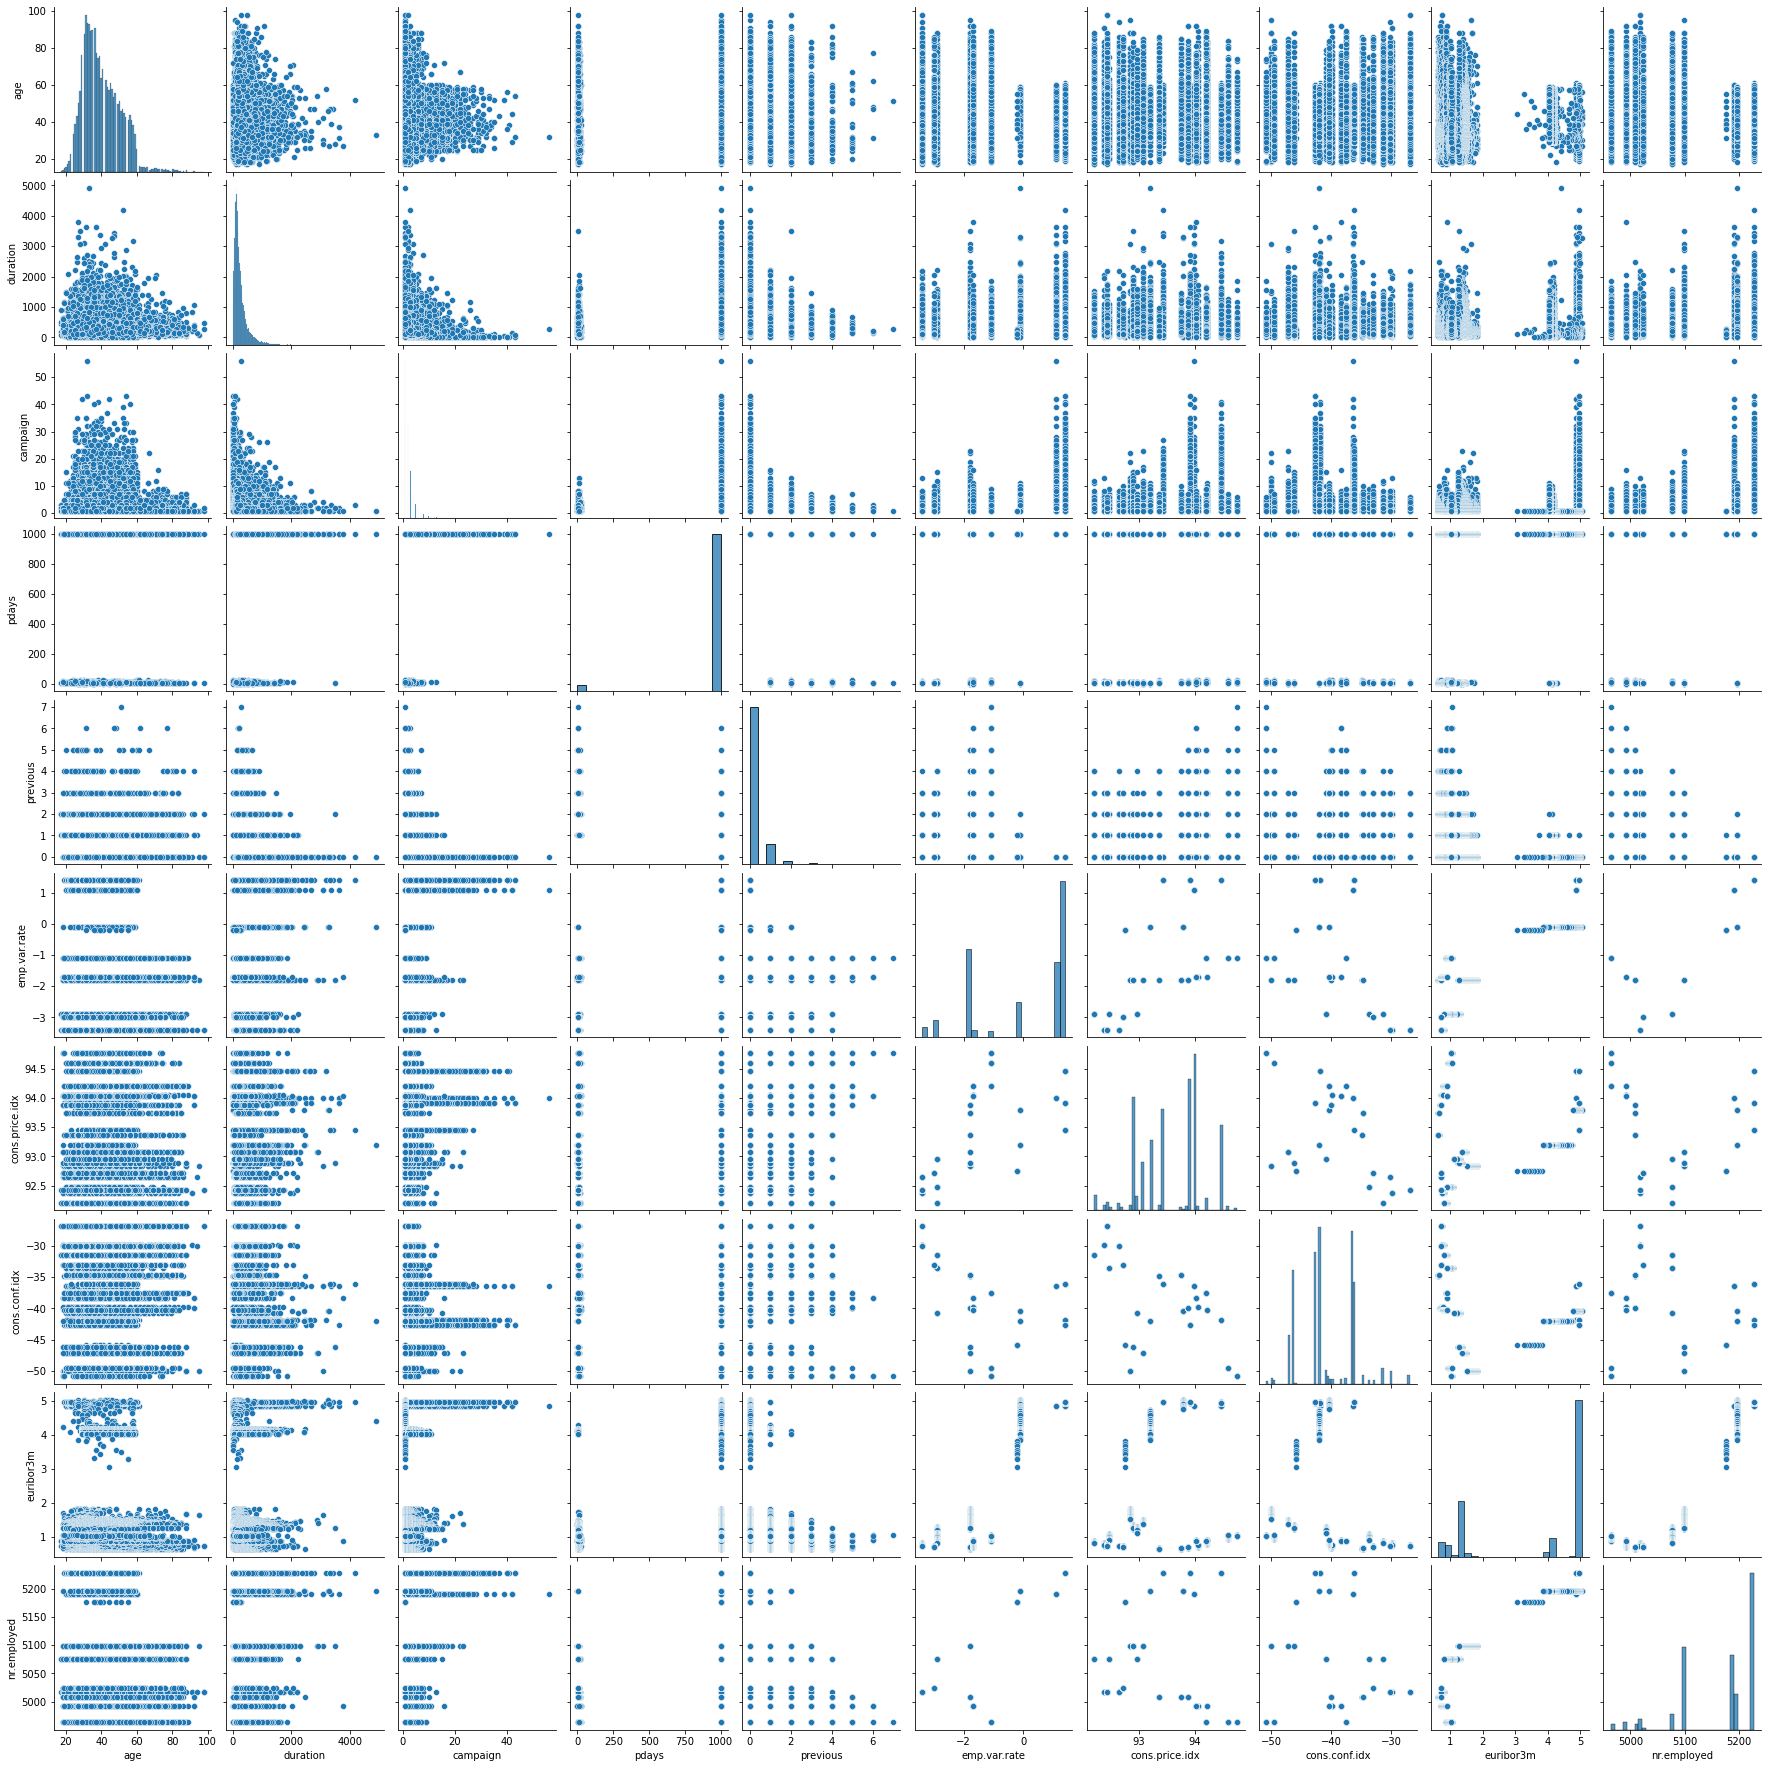

In [185]:
# THIS TAKES A LONG TIME!
sns.pairplot(df)

## Clustering

### Data Preparation

**UNSUPERVISED LEARNING REMINDER: NO NEED TO TRAIN TEST SPLIT!! NO LABEL TO "TEST" AGAINST!**

We do however need to transform categorical features into numeric ones where it makes sense to do so, as well as scaling the data due to distance being a key factor in clustering.

In [104]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [105]:
X = pd.get_dummies(df)

In [106]:
X.head()
# X['default_yes']

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
scaler = StandardScaler()

In [116]:
scaled_X = scaler.fit_transform(X)

### Creating and Fitting a KMeans Model

Note of our method choices here:

* fit(X[, y, sample_weight])
    * Compute k-means clustering.

* fit_predict(X[, y, sample_weight])
    * Compute cluster centers and predict cluster index for each sample.

* fit_transform(X[, y, sample_weight])
    * Compute clustering and transform X to cluster-distance space.

* predict(X[, sample_weight])
    * Predict the closest cluster each sample in X belongs to.

In [117]:
from sklearn.cluster import KMeans

In [118]:
# help(KMeans)

In [127]:
model = KMeans(n_clusters=2, random_state=42)

In [132]:
# Make sure to watch video to understand this line and fit() vs transform()
cluster_labels = model.fit_predict(scaled_X)

/home/pg/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [133]:
# IMPORTANT NOTE: YOUR 0s and 1s may be opposite of ours,
# makes sense, the number values are not significant!
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [125]:
len(scaled_X)

41188

In [124]:
len(cluster_labels)

41188

## Riunire con il dataframe

In sostanza abbiamo generato un campo di dati che rappresenta delle label, per capire esattamente come sono composte queste label andiamo a ricongiungere il risultato con i dati originali.


In [134]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0


In [135]:
X['Cluster'] = cluster_labels

In [136]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0


### Risultato:

Abbiamo creato una nuova colonna del dataset che è una label.

*Come posso interpretare quste label?*

Vediamo la correlazione:

<Axes: >

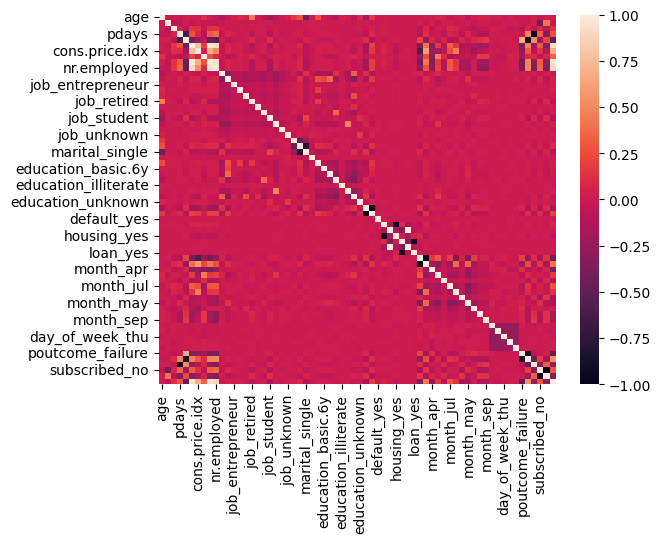

In [137]:
sns.heatmap(X.corr())

In [144]:
X.corr()['Cluster'][:-1]

age                     0.019699
duration               -0.039894
campaign                0.129129
pdays                   0.267700
previous               -0.478467
                          ...   
poutcome_failure       -0.464295
poutcome_nonexistent    0.544377
poutcome_success       -0.254393
subscribed_no           0.294610
subscribed_yes         -0.294610
Name: Cluster, Length: 65, dtype: float64

In [143]:
X.corr()['Cluster'][:-1].loc[X.corr()['Cluster'] > 0.47]


emp.var.rate            0.932612
cons.price.idx          0.679372
euribor3m               0.959297
nr.employed             0.886155
poutcome_nonexistent    0.544377
Name: Cluster, dtype: float64

In [145]:
X.corr()['Cluster'].iloc[:-1].sort_values()

previous               -0.478467
poutcome_failure       -0.464295
contact_cellular       -0.410476
month_apr              -0.357923
subscribed_yes         -0.294610
                          ...   
poutcome_nonexistent    0.544377
cons.price.idx          0.679372
nr.employed             0.886155
emp.var.rate            0.932612
euribor3m               0.959297
Name: Cluster, Length: 65, dtype: float64

<Axes: >

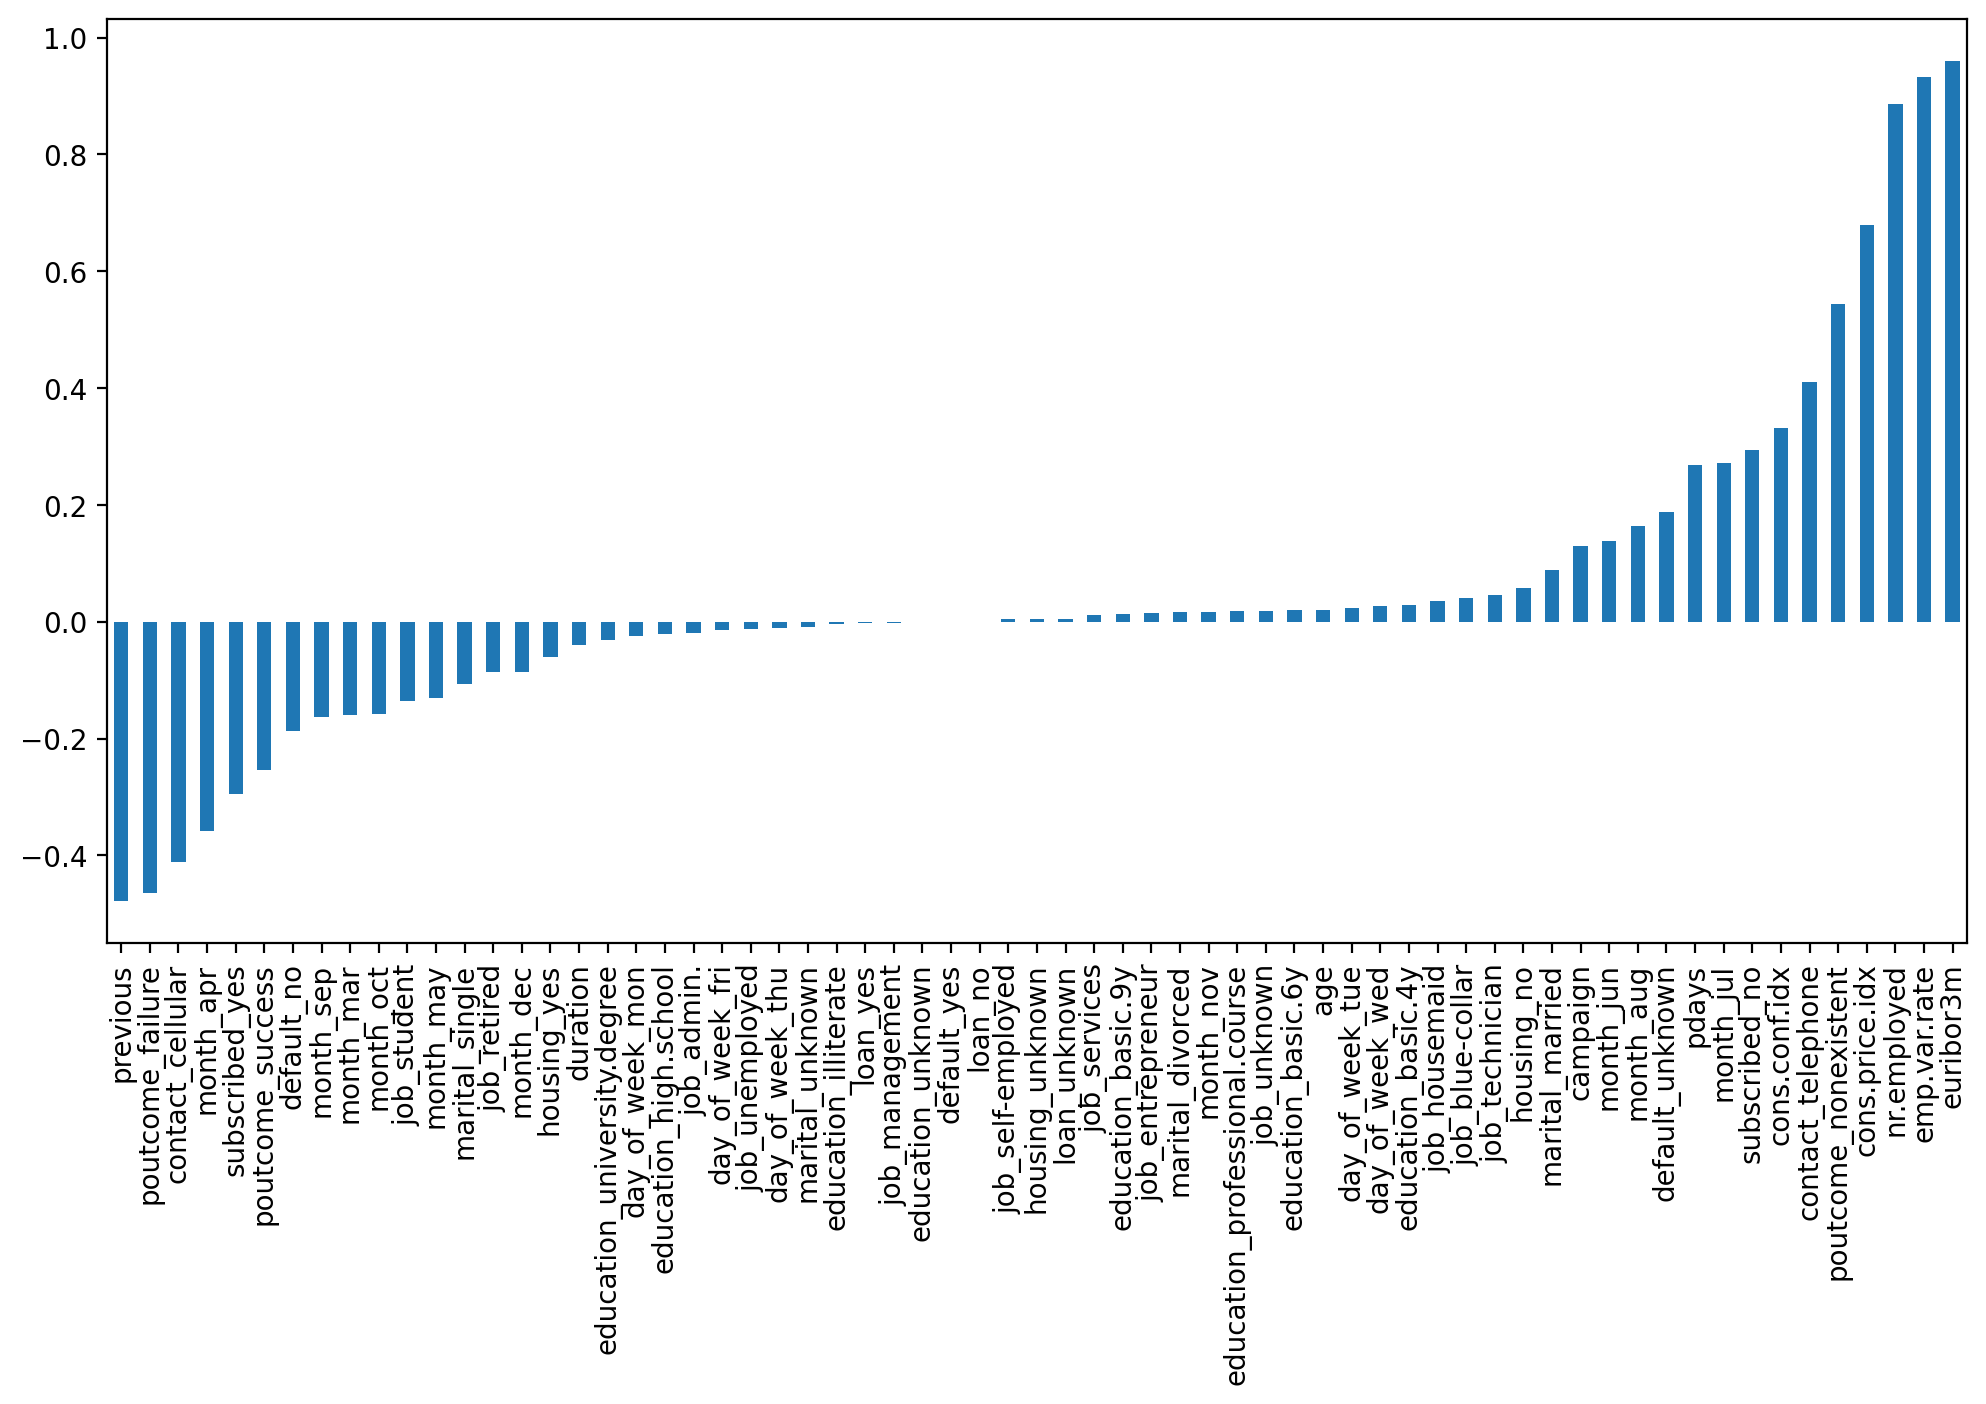

In [25]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

## Choosing K Value

In [27]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

/home/pg/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/pg/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/pg/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/pg/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/pg/.local/lib/python3.10/site-packages/skl

Text(0, 0.5, ' Sum of Squared Distances')

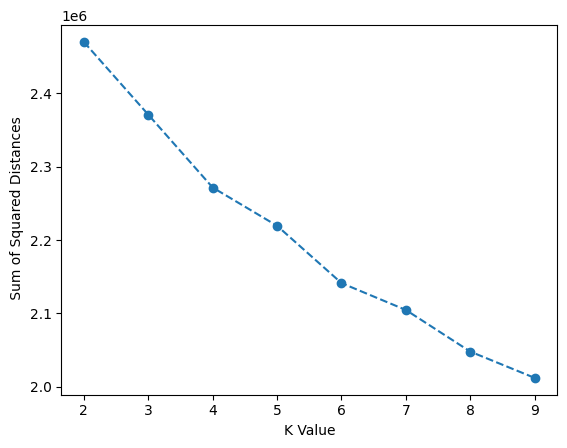

In [28]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

Analyzing SSE Reduction

In [29]:
ssd

[2469792.3616627525,
 2370786.5743646966,
 2271503.291848565,
 2219379.8165977024,
 2141338.8100297097,
 2104687.2262974633,
 2047992.063517177,
 2012166.6999391837]

In [30]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0             NaN
1   -99005.787298
2   -99283.282516
3   -52123.475251
4   -78041.006568
5   -36651.583732
6   -56695.162780
7   -35825.363578
dtype: float64

<Axes: >

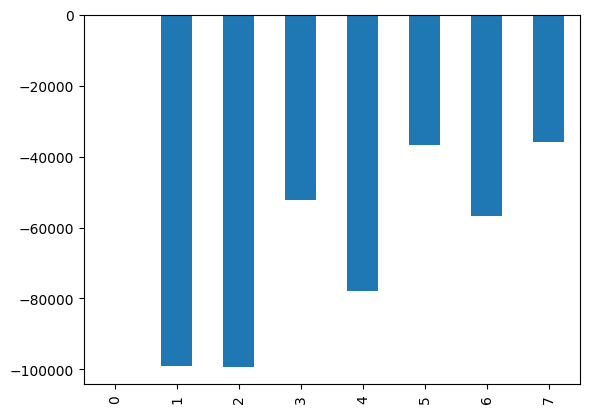

In [31]:
pd.Series(ssd).diff().plot(kind='bar')